In [99]:
import os
import numpy as np
from scipy.signal import stft


def compute_stft(csi_file_path, fs=1000, nfft=2048, nperseg=512, noverlap=256, window='hamming'):
    csi_data = np.load(csi_file_path)
    time, transmitter_count, receiver_count, subcarrier_count = csi_data.shape
    if time < 3000:
        csi_data = np.pad(csi_data, ((0, 3000 - time), (0, 0), (0, 0), (0, 0)), mode='constant', constant_values=0)

    Zxx_270 = []

    for tx in range(transmitter_count):
        for rx in range(receiver_count):
            for sc in range(subcarrier_count):
                signal = csi_data[:, tx, rx, sc]
                freqs, _, Zxx = stft(signal, fs=fs, nperseg=nperseg, noverlap=noverlap, nfft=nfft, window=window)
                freq_range = np.logical_and(freqs >= 0, freqs <= 60)
                Zxx_270.append(np.abs(Zxx[freq_range, :]))  # 使用绝对值保留幅度信息

    return np.array(Zxx_270)


def compute_save_all_stft(parent_path, save_parent_path,
                          fs=1000, nfft=2048, nperseg=512, noverlap=256, window='hamming'):
    if not os.path.exists(save_parent_path):
        os.makedirs(save_parent_path)

    for filename in os.listdir(parent_path):
        if filename.endswith('.npy'):
            Zxx_270 = compute_stft(os.path.join(parent_path, filename),
                                   fs=fs, nfft=nfft, nperseg=nperseg, noverlap=noverlap, window=window)
            save_path = os.path.join(save_parent_path, filename)
            np.save(save_path, Zxx_270)
            print(f"Saved STFT result for {filename} to {save_path}")


if __name__ == "__main__":
    compute_save_all_stft(r'E:\WorkSpace\WiMANS\dataset\wifi_csi\amp',
                          r'E:\WorkSpace\WiMANS\dataset\wifi_csi\stft')

Saved STFT result for act_100_1.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_1.npy
Saved STFT result for act_100_10.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_10.npy
Saved STFT result for act_100_11.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_11.npy
Saved STFT result for act_100_12.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_12.npy
Saved STFT result for act_100_13.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_13.npy
Saved STFT result for act_100_14.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_14.npy
Saved STFT result for act_100_15.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_15.npy
Saved STFT result for act_100_16.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_16.npy
Saved STFT result for act_100_17.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_17.npy
Saved STFT result for act_100_18.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_18.npy
Saved STFT result for act_100_19

Saved STFT result for act_100_87.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_87.npy
Saved STFT result for act_100_88.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_88.npy
Saved STFT result for act_100_89.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_89.npy
Saved STFT result for act_100_9.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_9.npy
Saved STFT result for act_100_90.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_90.npy
Saved STFT result for act_100_91.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_91.npy
Saved STFT result for act_100_92.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_92.npy
Saved STFT result for act_100_93.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_93.npy
Saved STFT result for act_100_94.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_94.npy
Saved STFT result for act_100_95.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_95.npy
Saved STFT result for act_100_96

Saved STFT result for act_101_76.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_76.npy
Saved STFT result for act_101_77.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_77.npy
Saved STFT result for act_101_78.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_78.npy
Saved STFT result for act_101_79.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_79.npy
Saved STFT result for act_101_8.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_8.npy
Saved STFT result for act_101_80.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_80.npy
Saved STFT result for act_101_81.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_81.npy
Saved STFT result for act_101_82.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_82.npy
Saved STFT result for act_101_83.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_83.npy
Saved STFT result for act_101_84.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_84.npy
Saved STFT result for act_101_85

Saved STFT result for act_102_66.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_66.npy
Saved STFT result for act_102_67.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_67.npy
Saved STFT result for act_102_68.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_68.npy
Saved STFT result for act_102_69.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_69.npy
Saved STFT result for act_102_7.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_7.npy
Saved STFT result for act_102_70.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_70.npy
Saved STFT result for act_102_71.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_71.npy
Saved STFT result for act_102_72.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_72.npy
Saved STFT result for act_102_73.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_73.npy
Saved STFT result for act_102_74.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_74.npy
Saved STFT result for act_102_75

Saved STFT result for act_103_56.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_56.npy
Saved STFT result for act_103_57.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_57.npy
Saved STFT result for act_103_58.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_58.npy
Saved STFT result for act_103_59.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_59.npy
Saved STFT result for act_103_6.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_6.npy
Saved STFT result for act_103_60.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_60.npy
Saved STFT result for act_103_61.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_61.npy
Saved STFT result for act_103_62.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_62.npy
Saved STFT result for act_103_63.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_63.npy
Saved STFT result for act_103_64.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_64.npy
Saved STFT result for act_103_65

Saved STFT result for act_104_46.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_46.npy
Saved STFT result for act_104_47.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_47.npy
Saved STFT result for act_104_48.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_48.npy
Saved STFT result for act_104_49.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_49.npy
Saved STFT result for act_104_5.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_5.npy
Saved STFT result for act_104_50.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_50.npy
Saved STFT result for act_104_51.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_51.npy
Saved STFT result for act_104_52.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_52.npy
Saved STFT result for act_104_53.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_53.npy
Saved STFT result for act_104_54.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_54.npy
Saved STFT result for act_104_55

Saved STFT result for act_105_36.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_105_36.npy
Saved STFT result for act_105_37.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_105_37.npy
Saved STFT result for act_105_38.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_105_38.npy
Saved STFT result for act_105_39.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_105_39.npy
Saved STFT result for act_105_4.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_105_4.npy
Saved STFT result for act_105_40.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_105_40.npy
Saved STFT result for act_105_41.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_105_41.npy
Saved STFT result for act_105_42.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_105_42.npy
Saved STFT result for act_105_43.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_105_43.npy
Saved STFT result for act_105_44.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_105_44.npy
Saved STFT result for act_105_45

Saved STFT result for act_106_24.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_24.npy
Saved STFT result for act_106_25.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_25.npy
Saved STFT result for act_106_26.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_26.npy
Saved STFT result for act_106_27.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_27.npy
Saved STFT result for act_106_28.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_28.npy
Saved STFT result for act_106_29.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_29.npy
Saved STFT result for act_106_3.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_3.npy
Saved STFT result for act_106_30.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_30.npy
Saved STFT result for act_106_31.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_31.npy
Saved STFT result for act_106_32.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_32.npy
Saved STFT result for act_106_33

Saved STFT result for act_107_12.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_12.npy
Saved STFT result for act_107_13.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_13.npy
Saved STFT result for act_107_14.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_14.npy
Saved STFT result for act_107_15.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_15.npy
Saved STFT result for act_107_16.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_16.npy
Saved STFT result for act_107_17.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_17.npy
Saved STFT result for act_107_18.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_18.npy
Saved STFT result for act_107_19.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_19.npy
Saved STFT result for act_107_2.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_2.npy
Saved STFT result for act_107_20.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_20.npy
Saved STFT result for act_107_21

Saved STFT result for act_107_92.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_92.npy
Saved STFT result for act_107_93.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_93.npy
Saved STFT result for act_107_94.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_94.npy
Saved STFT result for act_107_95.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_95.npy
Saved STFT result for act_107_96.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_96.npy
Saved STFT result for act_107_97.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_97.npy
Saved STFT result for act_107_98.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_98.npy
Saved STFT result for act_107_99.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_99.npy
Saved STFT result for act_108_1.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_1.npy
Saved STFT result for act_108_10.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_10.npy
Saved STFT result for act_108_11

Saved STFT result for act_108_82.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_82.npy
Saved STFT result for act_108_83.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_83.npy
Saved STFT result for act_108_84.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_84.npy
Saved STFT result for act_108_85.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_85.npy
Saved STFT result for act_108_86.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_86.npy
Saved STFT result for act_108_87.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_87.npy
Saved STFT result for act_108_88.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_88.npy
Saved STFT result for act_108_89.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_89.npy
Saved STFT result for act_108_9.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_9.npy
Saved STFT result for act_108_90.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_90.npy
Saved STFT result for act_108_91

Saved STFT result for act_10_74.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_74.npy
Saved STFT result for act_10_75.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_75.npy
Saved STFT result for act_10_76.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_76.npy
Saved STFT result for act_10_77.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_77.npy
Saved STFT result for act_10_78.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_78.npy
Saved STFT result for act_10_79.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_79.npy
Saved STFT result for act_10_8.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_8.npy
Saved STFT result for act_10_80.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_80.npy
Saved STFT result for act_10_81.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_81.npy
Saved STFT result for act_10_82.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_82.npy
Saved STFT result for act_10_83.npy to E:\WorkSpace\

Saved STFT result for act_11_63.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_11_63.npy
Saved STFT result for act_11_64.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_11_64.npy
Saved STFT result for act_11_65.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_11_65.npy
Saved STFT result for act_11_66.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_11_66.npy
Saved STFT result for act_11_67.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_11_67.npy
Saved STFT result for act_11_68.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_11_68.npy
Saved STFT result for act_11_69.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_11_69.npy
Saved STFT result for act_11_7.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_11_7.npy
Saved STFT result for act_11_70.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_11_70.npy
Saved STFT result for act_11_71.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_11_71.npy
Saved STFT result for act_11_72.npy to E:\WorkSpace\

Saved STFT result for act_12_54.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_12_54.npy
Saved STFT result for act_12_55.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_12_55.npy
Saved STFT result for act_12_56.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_12_56.npy
Saved STFT result for act_12_57.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_12_57.npy
Saved STFT result for act_12_58.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_12_58.npy
Saved STFT result for act_12_59.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_12_59.npy
Saved STFT result for act_12_6.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_12_6.npy
Saved STFT result for act_12_60.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_12_60.npy
Saved STFT result for act_12_61.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_12_61.npy
Saved STFT result for act_12_62.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_12_62.npy
Saved STFT result for act_12_63.npy to E:\WorkSpace\

Saved STFT result for act_13_44.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_44.npy
Saved STFT result for act_13_45.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_45.npy
Saved STFT result for act_13_46.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_46.npy
Saved STFT result for act_13_47.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_47.npy
Saved STFT result for act_13_48.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_48.npy
Saved STFT result for act_13_49.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_49.npy
Saved STFT result for act_13_5.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_5.npy
Saved STFT result for act_13_50.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_50.npy
Saved STFT result for act_13_51.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_51.npy
Saved STFT result for act_13_52.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_52.npy
Saved STFT result for act_13_53.npy to E:\WorkSpace\

Saved STFT result for act_14_33.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_33.npy
Saved STFT result for act_14_34.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_34.npy
Saved STFT result for act_14_35.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_35.npy
Saved STFT result for act_14_36.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_36.npy
Saved STFT result for act_14_37.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_37.npy
Saved STFT result for act_14_38.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_38.npy
Saved STFT result for act_14_39.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_39.npy
Saved STFT result for act_14_4.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_4.npy
Saved STFT result for act_14_40.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_40.npy
Saved STFT result for act_14_41.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_41.npy
Saved STFT result for act_14_42.npy to E:\WorkSpace\

Saved STFT result for act_15_24.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_24.npy
Saved STFT result for act_15_25.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_25.npy
Saved STFT result for act_15_26.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_26.npy
Saved STFT result for act_15_27.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_27.npy
Saved STFT result for act_15_28.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_28.npy
Saved STFT result for act_15_29.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_29.npy
Saved STFT result for act_15_3.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_3.npy
Saved STFT result for act_15_30.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_30.npy
Saved STFT result for act_15_31.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_31.npy
Saved STFT result for act_15_32.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_32.npy
Saved STFT result for act_15_33.npy to E:\WorkSpace\

Saved STFT result for act_16_15.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_15.npy
Saved STFT result for act_16_16.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_16.npy
Saved STFT result for act_16_17.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_17.npy
Saved STFT result for act_16_18.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_18.npy
Saved STFT result for act_16_19.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_19.npy
Saved STFT result for act_16_2.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_2.npy
Saved STFT result for act_16_20.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_20.npy
Saved STFT result for act_16_21.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_21.npy
Saved STFT result for act_16_22.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_22.npy
Saved STFT result for act_16_23.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_23.npy
Saved STFT result for act_16_24.npy to E:\WorkSpace\

Saved STFT result for act_16_97.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_97.npy
Saved STFT result for act_16_98.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_98.npy
Saved STFT result for act_16_99.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_99.npy
Saved STFT result for act_17_1.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_17_1.npy
Saved STFT result for act_17_10.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_17_10.npy
Saved STFT result for act_17_11.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_17_11.npy
Saved STFT result for act_17_12.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_17_12.npy
Saved STFT result for act_17_13.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_17_13.npy
Saved STFT result for act_17_14.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_17_14.npy
Saved STFT result for act_17_15.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_17_15.npy
Saved STFT result for act_17_16.npy to E:\WorkSpace\

Saved STFT result for act_17_9.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_17_9.npy
Saved STFT result for act_17_90.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_17_90.npy
Saved STFT result for act_17_91.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_17_91.npy
Saved STFT result for act_17_92.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_17_92.npy
Saved STFT result for act_17_93.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_17_93.npy
Saved STFT result for act_17_94.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_17_94.npy
Saved STFT result for act_17_95.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_17_95.npy
Saved STFT result for act_17_96.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_17_96.npy
Saved STFT result for act_17_97.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_17_97.npy
Saved STFT result for act_17_98.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_17_98.npy
Saved STFT result for act_17_99.npy to E:\WorkSpace\

Saved STFT result for act_18_81.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_81.npy
Saved STFT result for act_18_82.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_82.npy
Saved STFT result for act_18_83.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_83.npy
Saved STFT result for act_18_84.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_84.npy
Saved STFT result for act_18_85.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_85.npy
Saved STFT result for act_18_86.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_86.npy
Saved STFT result for act_18_87.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_87.npy
Saved STFT result for act_18_88.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_88.npy
Saved STFT result for act_18_89.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_89.npy
Saved STFT result for act_18_9.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_9.npy
Saved STFT result for act_18_90.npy to E:\WorkSpace\

Saved STFT result for act_19_72.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_72.npy
Saved STFT result for act_19_73.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_73.npy
Saved STFT result for act_19_74.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_74.npy
Saved STFT result for act_19_75.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_75.npy
Saved STFT result for act_19_76.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_76.npy
Saved STFT result for act_19_77.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_77.npy
Saved STFT result for act_19_78.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_78.npy
Saved STFT result for act_19_79.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_79.npy
Saved STFT result for act_19_8.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_8.npy
Saved STFT result for act_19_80.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_80.npy
Saved STFT result for act_19_81.npy to E:\WorkSpace\

Saved STFT result for act_1_65.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_65.npy
Saved STFT result for act_1_66.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_66.npy
Saved STFT result for act_1_67.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_67.npy
Saved STFT result for act_1_68.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_68.npy
Saved STFT result for act_1_69.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_69.npy
Saved STFT result for act_1_7.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_7.npy
Saved STFT result for act_1_70.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_70.npy
Saved STFT result for act_1_71.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_71.npy
Saved STFT result for act_1_72.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_72.npy
Saved STFT result for act_1_73.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_73.npy
Saved STFT result for act_1_74.npy to E:\WorkSpace\WiMANS\dataset\wifi_c

Saved STFT result for act_201_58.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_58.npy
Saved STFT result for act_201_59.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_59.npy
Saved STFT result for act_201_6.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_6.npy
Saved STFT result for act_201_60.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_60.npy
Saved STFT result for act_201_61.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_61.npy
Saved STFT result for act_201_62.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_62.npy
Saved STFT result for act_201_63.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_63.npy
Saved STFT result for act_201_64.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_64.npy
Saved STFT result for act_201_65.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_65.npy
Saved STFT result for act_201_66.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_66.npy
Saved STFT result for act_201_67

Saved STFT result for act_202_46.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_202_46.npy
Saved STFT result for act_202_47.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_202_47.npy
Saved STFT result for act_202_48.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_202_48.npy
Saved STFT result for act_202_49.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_202_49.npy
Saved STFT result for act_202_5.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_202_5.npy
Saved STFT result for act_202_50.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_202_50.npy
Saved STFT result for act_202_51.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_202_51.npy
Saved STFT result for act_202_52.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_202_52.npy
Saved STFT result for act_202_53.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_202_53.npy
Saved STFT result for act_202_54.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_202_54.npy
Saved STFT result for act_202_55

Saved STFT result for act_203_33.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_203_33.npy
Saved STFT result for act_203_34.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_203_34.npy
Saved STFT result for act_203_35.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_203_35.npy
Saved STFT result for act_203_36.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_203_36.npy
Saved STFT result for act_203_37.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_203_37.npy
Saved STFT result for act_203_38.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_203_38.npy
Saved STFT result for act_203_39.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_203_39.npy
Saved STFT result for act_203_4.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_203_4.npy
Saved STFT result for act_203_40.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_203_40.npy
Saved STFT result for act_203_41.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_203_41.npy
Saved STFT result for act_203_42

Saved STFT result for act_204_23.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_23.npy
Saved STFT result for act_204_24.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_24.npy
Saved STFT result for act_204_25.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_25.npy
Saved STFT result for act_204_26.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_26.npy
Saved STFT result for act_204_27.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_27.npy
Saved STFT result for act_204_28.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_28.npy
Saved STFT result for act_204_29.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_29.npy
Saved STFT result for act_204_3.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_3.npy
Saved STFT result for act_204_30.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_30.npy
Saved STFT result for act_204_31.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_31.npy
Saved STFT result for act_204_32

Saved STFT result for act_205_10.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_10.npy
Saved STFT result for act_205_11.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_11.npy
Saved STFT result for act_205_12.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_12.npy
Saved STFT result for act_205_13.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_13.npy
Saved STFT result for act_205_14.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_14.npy
Saved STFT result for act_205_15.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_15.npy
Saved STFT result for act_205_16.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_16.npy
Saved STFT result for act_205_17.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_17.npy
Saved STFT result for act_205_18.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_18.npy
Saved STFT result for act_205_19.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_19.npy
Saved STFT result for act_205_

Saved STFT result for act_205_89.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_89.npy
Saved STFT result for act_205_9.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_9.npy
Saved STFT result for act_205_90.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_90.npy
Saved STFT result for act_205_91.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_91.npy
Saved STFT result for act_205_92.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_92.npy
Saved STFT result for act_205_93.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_93.npy
Saved STFT result for act_205_94.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_94.npy
Saved STFT result for act_205_95.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_95.npy
Saved STFT result for act_205_96.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_96.npy
Saved STFT result for act_205_97.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_97.npy
Saved STFT result for act_205_98

Saved STFT result for act_206_77.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_77.npy
Saved STFT result for act_206_78.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_78.npy
Saved STFT result for act_206_79.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_79.npy
Saved STFT result for act_206_8.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_8.npy
Saved STFT result for act_206_80.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_80.npy
Saved STFT result for act_206_81.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_81.npy
Saved STFT result for act_206_82.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_82.npy
Saved STFT result for act_206_83.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_83.npy
Saved STFT result for act_206_84.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_84.npy
Saved STFT result for act_206_85.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_85.npy
Saved STFT result for act_206_86

Saved STFT result for act_20_66.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_66.npy
Saved STFT result for act_20_67.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_67.npy
Saved STFT result for act_20_68.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_68.npy
Saved STFT result for act_20_69.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_69.npy
Saved STFT result for act_20_7.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_7.npy
Saved STFT result for act_20_70.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_70.npy
Saved STFT result for act_20_71.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_71.npy
Saved STFT result for act_20_72.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_72.npy
Saved STFT result for act_20_73.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_73.npy
Saved STFT result for act_20_74.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_74.npy
Saved STFT result for act_20_75.npy to E:\WorkSpace\

Saved STFT result for act_21_58.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_21_58.npy
Saved STFT result for act_21_59.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_21_59.npy
Saved STFT result for act_21_6.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_21_6.npy
Saved STFT result for act_21_60.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_21_60.npy
Saved STFT result for act_21_61.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_21_61.npy
Saved STFT result for act_21_62.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_21_62.npy
Saved STFT result for act_21_63.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_21_63.npy
Saved STFT result for act_21_64.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_21_64.npy
Saved STFT result for act_21_65.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_21_65.npy
Saved STFT result for act_21_66.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_21_66.npy
Saved STFT result for act_21_67.npy to E:\WorkSpace\

Saved STFT result for act_22_50.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_22_50.npy
Saved STFT result for act_22_51.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_22_51.npy
Saved STFT result for act_22_52.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_22_52.npy
Saved STFT result for act_22_53.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_22_53.npy
Saved STFT result for act_22_54.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_22_54.npy
Saved STFT result for act_22_55.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_22_55.npy
Saved STFT result for act_22_56.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_22_56.npy
Saved STFT result for act_22_57.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_22_57.npy
Saved STFT result for act_22_58.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_22_58.npy
Saved STFT result for act_22_59.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_22_59.npy
Saved STFT result for act_22_6.npy to E:\WorkSpace

Saved STFT result for act_23_42.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_23_42.npy
Saved STFT result for act_23_43.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_23_43.npy
Saved STFT result for act_23_44.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_23_44.npy
Saved STFT result for act_23_45.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_23_45.npy
Saved STFT result for act_23_46.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_23_46.npy
Saved STFT result for act_23_47.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_23_47.npy
Saved STFT result for act_23_48.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_23_48.npy
Saved STFT result for act_23_49.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_23_49.npy
Saved STFT result for act_23_5.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_23_5.npy
Saved STFT result for act_23_50.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_23_50.npy
Saved STFT result for act_23_51.npy to E:\WorkSpace\

Saved STFT result for act_24_31.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_24_31.npy
Saved STFT result for act_24_32.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_24_32.npy
Saved STFT result for act_24_33.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_24_33.npy
Saved STFT result for act_24_34.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_24_34.npy
Saved STFT result for act_24_35.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_24_35.npy
Saved STFT result for act_24_36.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_24_36.npy
Saved STFT result for act_24_37.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_24_37.npy
Saved STFT result for act_24_38.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_24_38.npy
Saved STFT result for act_24_39.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_24_39.npy
Saved STFT result for act_24_4.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_24_4.npy
Saved STFT result for act_24_40.npy to E:\WorkSpace\

Saved STFT result for act_25_22.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_25_22.npy
Saved STFT result for act_25_23.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_25_23.npy
Saved STFT result for act_25_24.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_25_24.npy
Saved STFT result for act_25_25.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_25_25.npy
Saved STFT result for act_25_26.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_25_26.npy
Saved STFT result for act_25_27.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_25_27.npy
Saved STFT result for act_25_28.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_25_28.npy
Saved STFT result for act_25_29.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_25_29.npy
Saved STFT result for act_25_3.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_25_3.npy
Saved STFT result for act_25_30.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_25_30.npy
Saved STFT result for act_25_31.npy to E:\WorkSpace\

Saved STFT result for act_26_12.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_26_12.npy
Saved STFT result for act_26_13.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_26_13.npy
Saved STFT result for act_26_14.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_26_14.npy
Saved STFT result for act_26_15.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_26_15.npy
Saved STFT result for act_26_16.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_26_16.npy
Saved STFT result for act_26_17.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_26_17.npy
Saved STFT result for act_26_18.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_26_18.npy
Saved STFT result for act_26_19.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_26_19.npy
Saved STFT result for act_26_2.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_26_2.npy
Saved STFT result for act_26_20.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_26_20.npy
Saved STFT result for act_26_21.npy to E:\WorkSpace\

Saved STFT result for act_26_92.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_26_92.npy
Saved STFT result for act_26_93.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_26_93.npy
Saved STFT result for act_26_94.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_26_94.npy
Saved STFT result for act_26_95.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_26_95.npy
Saved STFT result for act_26_96.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_26_96.npy
Saved STFT result for act_26_97.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_26_97.npy
Saved STFT result for act_26_98.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_26_98.npy
Saved STFT result for act_26_99.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_26_99.npy
Saved STFT result for act_27_1.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_27_1.npy
Saved STFT result for act_27_10.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_27_10.npy
Saved STFT result for act_27_11.npy to E:\WorkSpace\

Saved STFT result for act_27_83.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_27_83.npy
Saved STFT result for act_27_84.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_27_84.npy
Saved STFT result for act_27_85.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_27_85.npy
Saved STFT result for act_27_86.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_27_86.npy
Saved STFT result for act_27_87.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_27_87.npy
Saved STFT result for act_27_88.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_27_88.npy
Saved STFT result for act_27_89.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_27_89.npy
Saved STFT result for act_27_9.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_27_9.npy
Saved STFT result for act_27_90.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_27_90.npy
Saved STFT result for act_27_91.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_27_91.npy
Saved STFT result for act_27_92.npy to E:\WorkSpace\

Saved STFT result for act_28_73.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_28_73.npy
Saved STFT result for act_28_74.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_28_74.npy
Saved STFT result for act_28_75.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_28_75.npy
Saved STFT result for act_28_76.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_28_76.npy
Saved STFT result for act_28_77.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_28_77.npy
Saved STFT result for act_28_78.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_28_78.npy
Saved STFT result for act_28_79.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_28_79.npy
Saved STFT result for act_28_8.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_28_8.npy
Saved STFT result for act_28_80.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_28_80.npy
Saved STFT result for act_28_81.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_28_81.npy
Saved STFT result for act_28_82.npy to E:\WorkSpace\

Saved STFT result for act_29_62.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_29_62.npy
Saved STFT result for act_29_63.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_29_63.npy
Saved STFT result for act_29_64.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_29_64.npy
Saved STFT result for act_29_65.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_29_65.npy
Saved STFT result for act_29_66.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_29_66.npy
Saved STFT result for act_29_67.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_29_67.npy
Saved STFT result for act_29_68.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_29_68.npy
Saved STFT result for act_29_69.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_29_69.npy
Saved STFT result for act_29_7.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_29_7.npy
Saved STFT result for act_29_70.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_29_70.npy
Saved STFT result for act_29_71.npy to E:\WorkSpace\

Saved STFT result for act_2_52.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_2_52.npy
Saved STFT result for act_2_53.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_2_53.npy
Saved STFT result for act_2_54.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_2_54.npy
Saved STFT result for act_2_55.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_2_55.npy
Saved STFT result for act_2_56.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_2_56.npy
Saved STFT result for act_2_57.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_2_57.npy
Saved STFT result for act_2_58.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_2_58.npy
Saved STFT result for act_2_59.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_2_59.npy
Saved STFT result for act_2_6.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_2_6.npy
Saved STFT result for act_2_60.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_2_60.npy
Saved STFT result for act_2_61.npy to E:\WorkSpace\WiMANS\dataset\wifi_c

Saved STFT result for act_30_43.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_30_43.npy
Saved STFT result for act_30_44.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_30_44.npy
Saved STFT result for act_30_45.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_30_45.npy
Saved STFT result for act_30_46.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_30_46.npy
Saved STFT result for act_30_47.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_30_47.npy
Saved STFT result for act_30_48.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_30_48.npy
Saved STFT result for act_30_49.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_30_49.npy
Saved STFT result for act_30_5.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_30_5.npy
Saved STFT result for act_30_50.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_30_50.npy
Saved STFT result for act_30_51.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_30_51.npy
Saved STFT result for act_30_52.npy to E:\WorkSpace\

Saved STFT result for act_31_32.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_31_32.npy
Saved STFT result for act_31_33.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_31_33.npy
Saved STFT result for act_31_34.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_31_34.npy
Saved STFT result for act_31_35.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_31_35.npy
Saved STFT result for act_31_36.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_31_36.npy
Saved STFT result for act_31_37.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_31_37.npy
Saved STFT result for act_31_38.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_31_38.npy
Saved STFT result for act_31_39.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_31_39.npy
Saved STFT result for act_31_4.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_31_4.npy
Saved STFT result for act_31_40.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_31_40.npy
Saved STFT result for act_31_41.npy to E:\WorkSpace\

Saved STFT result for act_32_24.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_32_24.npy
Saved STFT result for act_32_25.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_32_25.npy
Saved STFT result for act_32_26.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_32_26.npy
Saved STFT result for act_32_27.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_32_27.npy
Saved STFT result for act_32_28.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_32_28.npy
Saved STFT result for act_32_29.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_32_29.npy
Saved STFT result for act_32_3.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_32_3.npy
Saved STFT result for act_32_30.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_32_30.npy
Saved STFT result for act_32_31.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_32_31.npy
Saved STFT result for act_32_32.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_32_32.npy
Saved STFT result for act_32_33.npy to E:\WorkSpace\

Saved STFT result for act_33_17.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_33_17.npy
Saved STFT result for act_33_18.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_33_18.npy
Saved STFT result for act_33_19.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_33_19.npy
Saved STFT result for act_33_2.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_33_2.npy
Saved STFT result for act_33_20.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_33_20.npy
Saved STFT result for act_33_21.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_33_21.npy
Saved STFT result for act_33_22.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_33_22.npy
Saved STFT result for act_33_23.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_33_23.npy
Saved STFT result for act_33_24.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_33_24.npy
Saved STFT result for act_33_25.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_33_25.npy
Saved STFT result for act_33_26.npy to E:\WorkSpace\

Saved STFT result for act_34_1.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_34_1.npy
Saved STFT result for act_34_10.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_34_10.npy
Saved STFT result for act_34_11.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_34_11.npy
Saved STFT result for act_34_12.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_34_12.npy
Saved STFT result for act_34_13.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_34_13.npy
Saved STFT result for act_34_14.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_34_14.npy
Saved STFT result for act_34_15.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_34_15.npy
Saved STFT result for act_34_16.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_34_16.npy
Saved STFT result for act_34_17.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_34_17.npy
Saved STFT result for act_34_18.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_34_18.npy
Saved STFT result for act_34_19.npy to E:\WorkSpace\

Saved STFT result for act_34_89.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_34_89.npy
Saved STFT result for act_34_9.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_34_9.npy
Saved STFT result for act_34_90.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_34_90.npy
Saved STFT result for act_34_91.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_34_91.npy
Saved STFT result for act_34_92.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_34_92.npy
Saved STFT result for act_34_93.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_34_93.npy
Saved STFT result for act_34_94.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_34_94.npy
Saved STFT result for act_34_95.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_34_95.npy
Saved STFT result for act_34_96.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_34_96.npy
Saved STFT result for act_34_97.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_34_97.npy
Saved STFT result for act_34_98.npy to E:\WorkSpace\

Saved STFT result for act_35_78.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_35_78.npy
Saved STFT result for act_35_79.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_35_79.npy
Saved STFT result for act_35_8.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_35_8.npy
Saved STFT result for act_35_80.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_35_80.npy
Saved STFT result for act_35_81.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_35_81.npy
Saved STFT result for act_35_82.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_35_82.npy
Saved STFT result for act_35_83.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_35_83.npy
Saved STFT result for act_35_84.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_35_84.npy
Saved STFT result for act_35_85.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_35_85.npy
Saved STFT result for act_35_86.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_35_86.npy
Saved STFT result for act_35_87.npy to E:\WorkSpace\

Saved STFT result for act_36_69.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_36_69.npy
Saved STFT result for act_36_7.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_36_7.npy
Saved STFT result for act_36_70.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_36_70.npy
Saved STFT result for act_36_71.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_36_71.npy
Saved STFT result for act_36_72.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_36_72.npy
Saved STFT result for act_36_73.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_36_73.npy
Saved STFT result for act_36_74.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_36_74.npy
Saved STFT result for act_36_75.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_36_75.npy
Saved STFT result for act_36_76.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_36_76.npy
Saved STFT result for act_36_77.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_36_77.npy
Saved STFT result for act_36_78.npy to E:\WorkSpace\

Saved STFT result for act_37_6.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_37_6.npy
Saved STFT result for act_37_60.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_37_60.npy
Saved STFT result for act_37_61.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_37_61.npy
Saved STFT result for act_37_62.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_37_62.npy
Saved STFT result for act_37_63.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_37_63.npy
Saved STFT result for act_37_64.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_37_64.npy
Saved STFT result for act_37_65.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_37_65.npy
Saved STFT result for act_37_66.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_37_66.npy
Saved STFT result for act_37_67.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_37_67.npy
Saved STFT result for act_37_68.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_37_68.npy
Saved STFT result for act_37_69.npy to E:\WorkSpace\

Saved STFT result for act_38_50.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_38_50.npy
Saved STFT result for act_38_51.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_38_51.npy
Saved STFT result for act_38_52.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_38_52.npy
Saved STFT result for act_38_53.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_38_53.npy
Saved STFT result for act_38_54.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_38_54.npy
Saved STFT result for act_38_55.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_38_55.npy
Saved STFT result for act_38_56.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_38_56.npy
Saved STFT result for act_38_57.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_38_57.npy
Saved STFT result for act_38_58.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_38_58.npy
Saved STFT result for act_38_59.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_38_59.npy
Saved STFT result for act_38_6.npy to E:\WorkSpace

Saved STFT result for act_39_40.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_39_40.npy
Saved STFT result for act_39_41.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_39_41.npy
Saved STFT result for act_39_42.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_39_42.npy
Saved STFT result for act_39_43.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_39_43.npy
Saved STFT result for act_39_44.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_39_44.npy
Saved STFT result for act_39_45.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_39_45.npy
Saved STFT result for act_39_46.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_39_46.npy
Saved STFT result for act_39_47.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_39_47.npy
Saved STFT result for act_39_48.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_39_48.npy
Saved STFT result for act_39_49.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_39_49.npy
Saved STFT result for act_39_5.npy to E:\WorkSpace

Saved STFT result for act_3_33.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_3_33.npy
Saved STFT result for act_3_34.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_3_34.npy
Saved STFT result for act_3_35.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_3_35.npy
Saved STFT result for act_3_36.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_3_36.npy
Saved STFT result for act_3_37.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_3_37.npy
Saved STFT result for act_3_38.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_3_38.npy
Saved STFT result for act_3_39.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_3_39.npy
Saved STFT result for act_3_4.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_3_4.npy
Saved STFT result for act_3_40.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_3_40.npy
Saved STFT result for act_3_41.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_3_41.npy
Saved STFT result for act_3_42.npy to E:\WorkSpace\WiMANS\dataset\wifi_c

Saved STFT result for act_40_25.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_40_25.npy
Saved STFT result for act_40_26.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_40_26.npy
Saved STFT result for act_40_27.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_40_27.npy
Saved STFT result for act_40_28.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_40_28.npy
Saved STFT result for act_40_29.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_40_29.npy
Saved STFT result for act_40_3.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_40_3.npy
Saved STFT result for act_40_30.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_40_30.npy
Saved STFT result for act_40_31.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_40_31.npy
Saved STFT result for act_40_32.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_40_32.npy
Saved STFT result for act_40_33.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_40_33.npy
Saved STFT result for act_40_34.npy to E:\WorkSpace\

Saved STFT result for act_41_17.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_41_17.npy
Saved STFT result for act_41_18.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_41_18.npy
Saved STFT result for act_41_19.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_41_19.npy
Saved STFT result for act_41_2.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_41_2.npy
Saved STFT result for act_41_20.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_41_20.npy
Saved STFT result for act_41_21.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_41_21.npy
Saved STFT result for act_41_22.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_41_22.npy
Saved STFT result for act_41_23.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_41_23.npy
Saved STFT result for act_41_24.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_41_24.npy
Saved STFT result for act_41_25.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_41_25.npy
Saved STFT result for act_41_26.npy to E:\WorkSpace\

Saved STFT result for act_41_97.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_41_97.npy
Saved STFT result for act_41_98.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_41_98.npy
Saved STFT result for act_41_99.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_41_99.npy
Saved STFT result for act_42_1.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_42_1.npy
Saved STFT result for act_42_10.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_42_10.npy
Saved STFT result for act_42_11.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_42_11.npy
Saved STFT result for act_42_12.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_42_12.npy
Saved STFT result for act_42_13.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_42_13.npy
Saved STFT result for act_42_14.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_42_14.npy
Saved STFT result for act_42_15.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_42_15.npy
Saved STFT result for act_42_16.npy to E:\WorkSpace\

Saved STFT result for act_42_89.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_42_89.npy
Saved STFT result for act_42_9.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_42_9.npy
Saved STFT result for act_42_90.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_42_90.npy
Saved STFT result for act_42_91.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_42_91.npy
Saved STFT result for act_42_92.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_42_92.npy
Saved STFT result for act_42_93.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_42_93.npy
Saved STFT result for act_42_94.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_42_94.npy
Saved STFT result for act_42_95.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_42_95.npy
Saved STFT result for act_42_96.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_42_96.npy
Saved STFT result for act_42_97.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_42_97.npy
Saved STFT result for act_42_98.npy to E:\WorkSpace\

Saved STFT result for act_43_8.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_43_8.npy
Saved STFT result for act_43_80.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_43_80.npy
Saved STFT result for act_43_81.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_43_81.npy
Saved STFT result for act_43_82.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_43_82.npy
Saved STFT result for act_43_83.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_43_83.npy
Saved STFT result for act_43_84.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_43_84.npy
Saved STFT result for act_43_85.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_43_85.npy
Saved STFT result for act_43_86.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_43_86.npy
Saved STFT result for act_43_87.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_43_87.npy
Saved STFT result for act_43_88.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_43_88.npy
Saved STFT result for act_43_89.npy to E:\WorkSpace\

Saved STFT result for act_44_7.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_44_7.npy
Saved STFT result for act_44_70.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_44_70.npy
Saved STFT result for act_44_71.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_44_71.npy
Saved STFT result for act_44_72.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_44_72.npy
Saved STFT result for act_44_73.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_44_73.npy
Saved STFT result for act_44_74.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_44_74.npy
Saved STFT result for act_44_75.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_44_75.npy
Saved STFT result for act_44_76.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_44_76.npy
Saved STFT result for act_44_77.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_44_77.npy
Saved STFT result for act_44_78.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_44_78.npy
Saved STFT result for act_44_79.npy to E:\WorkSpace\

Saved STFT result for act_45_59.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_45_59.npy
Saved STFT result for act_45_6.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_45_6.npy
Saved STFT result for act_45_60.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_45_60.npy
Saved STFT result for act_45_61.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_45_61.npy
Saved STFT result for act_45_62.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_45_62.npy
Saved STFT result for act_45_63.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_45_63.npy
Saved STFT result for act_45_64.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_45_64.npy
Saved STFT result for act_45_65.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_45_65.npy
Saved STFT result for act_45_66.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_45_66.npy
Saved STFT result for act_45_67.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_45_67.npy
Saved STFT result for act_45_68.npy to E:\WorkSpace\

Saved STFT result for act_46_50.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_46_50.npy
Saved STFT result for act_46_51.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_46_51.npy
Saved STFT result for act_46_52.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_46_52.npy
Saved STFT result for act_46_53.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_46_53.npy
Saved STFT result for act_46_54.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_46_54.npy
Saved STFT result for act_46_55.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_46_55.npy
Saved STFT result for act_46_56.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_46_56.npy
Saved STFT result for act_46_57.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_46_57.npy
Saved STFT result for act_46_58.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_46_58.npy
Saved STFT result for act_46_59.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_46_59.npy
Saved STFT result for act_46_6.npy to E:\WorkSpace

Saved STFT result for act_47_43.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_47_43.npy
Saved STFT result for act_47_44.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_47_44.npy
Saved STFT result for act_47_45.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_47_45.npy
Saved STFT result for act_47_46.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_47_46.npy
Saved STFT result for act_47_47.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_47_47.npy
Saved STFT result for act_47_48.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_47_48.npy
Saved STFT result for act_47_49.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_47_49.npy
Saved STFT result for act_47_5.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_47_5.npy
Saved STFT result for act_47_50.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_47_50.npy
Saved STFT result for act_47_51.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_47_51.npy
Saved STFT result for act_47_52.npy to E:\WorkSpace\

Saved STFT result for act_48_35.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_48_35.npy
Saved STFT result for act_48_36.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_48_36.npy
Saved STFT result for act_48_37.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_48_37.npy
Saved STFT result for act_48_38.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_48_38.npy
Saved STFT result for act_48_39.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_48_39.npy
Saved STFT result for act_48_4.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_48_4.npy
Saved STFT result for act_48_40.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_48_40.npy
Saved STFT result for act_48_41.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_48_41.npy
Saved STFT result for act_48_42.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_48_42.npy
Saved STFT result for act_48_43.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_48_43.npy
Saved STFT result for act_48_44.npy to E:\WorkSpace\

Saved STFT result for act_49_25.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_49_25.npy
Saved STFT result for act_49_26.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_49_26.npy
Saved STFT result for act_49_27.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_49_27.npy
Saved STFT result for act_49_28.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_49_28.npy
Saved STFT result for act_49_29.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_49_29.npy
Saved STFT result for act_49_3.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_49_3.npy
Saved STFT result for act_49_30.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_49_30.npy
Saved STFT result for act_49_31.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_49_31.npy
Saved STFT result for act_49_32.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_49_32.npy
Saved STFT result for act_49_33.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_49_33.npy
Saved STFT result for act_49_34.npy to E:\WorkSpace\

Saved STFT result for act_4_14.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_4_14.npy
Saved STFT result for act_4_15.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_4_15.npy
Saved STFT result for act_4_16.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_4_16.npy
Saved STFT result for act_4_17.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_4_17.npy
Saved STFT result for act_4_18.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_4_18.npy
Saved STFT result for act_4_19.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_4_19.npy
Saved STFT result for act_4_2.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_4_2.npy
Saved STFT result for act_4_20.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_4_20.npy
Saved STFT result for act_4_21.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_4_21.npy
Saved STFT result for act_4_22.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_4_22.npy
Saved STFT result for act_4_23.npy to E:\WorkSpace\WiMANS\dataset\wifi_c

Saved STFT result for act_4_96.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_4_96.npy
Saved STFT result for act_4_97.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_4_97.npy
Saved STFT result for act_4_98.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_4_98.npy
Saved STFT result for act_4_99.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_4_99.npy
Saved STFT result for act_50_1.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_50_1.npy
Saved STFT result for act_50_10.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_50_10.npy
Saved STFT result for act_50_11.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_50_11.npy
Saved STFT result for act_50_12.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_50_12.npy
Saved STFT result for act_50_13.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_50_13.npy
Saved STFT result for act_50_14.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_50_14.npy
Saved STFT result for act_50_15.npy to E:\WorkSpace\WiMANS\d

Saved STFT result for act_50_85.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_50_85.npy
Saved STFT result for act_50_86.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_50_86.npy
Saved STFT result for act_50_87.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_50_87.npy
Saved STFT result for act_50_88.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_50_88.npy
Saved STFT result for act_50_89.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_50_89.npy
Saved STFT result for act_50_9.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_50_9.npy
Saved STFT result for act_50_90.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_50_90.npy
Saved STFT result for act_50_91.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_50_91.npy
Saved STFT result for act_50_92.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_50_92.npy
Saved STFT result for act_50_93.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_50_93.npy
Saved STFT result for act_50_94.npy to E:\WorkSpace\

Saved STFT result for act_51_78.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_51_78.npy
Saved STFT result for act_51_79.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_51_79.npy
Saved STFT result for act_51_8.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_51_8.npy
Saved STFT result for act_51_80.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_51_80.npy
Saved STFT result for act_51_81.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_51_81.npy
Saved STFT result for act_51_82.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_51_82.npy
Saved STFT result for act_51_83.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_51_83.npy
Saved STFT result for act_51_84.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_51_84.npy
Saved STFT result for act_51_85.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_51_85.npy
Saved STFT result for act_51_86.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_51_86.npy
Saved STFT result for act_51_87.npy to E:\WorkSpace\

Saved STFT result for act_52_7.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_52_7.npy
Saved STFT result for act_52_70.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_52_70.npy
Saved STFT result for act_52_71.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_52_71.npy
Saved STFT result for act_52_72.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_52_72.npy
Saved STFT result for act_52_73.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_52_73.npy
Saved STFT result for act_52_74.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_52_74.npy
Saved STFT result for act_52_75.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_52_75.npy
Saved STFT result for act_52_76.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_52_76.npy
Saved STFT result for act_52_77.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_52_77.npy
Saved STFT result for act_52_78.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_52_78.npy
Saved STFT result for act_52_79.npy to E:\WorkSpace\

Saved STFT result for act_53_6.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_53_6.npy
Saved STFT result for act_53_60.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_53_60.npy
Saved STFT result for act_53_61.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_53_61.npy
Saved STFT result for act_53_62.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_53_62.npy
Saved STFT result for act_53_63.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_53_63.npy
Saved STFT result for act_53_64.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_53_64.npy
Saved STFT result for act_53_65.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_53_65.npy
Saved STFT result for act_53_66.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_53_66.npy
Saved STFT result for act_53_67.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_53_67.npy
Saved STFT result for act_53_68.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_53_68.npy
Saved STFT result for act_53_69.npy to E:\WorkSpace\

Saved STFT result for act_54_5.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_54_5.npy
Saved STFT result for act_54_50.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_54_50.npy
Saved STFT result for act_54_51.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_54_51.npy
Saved STFT result for act_54_52.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_54_52.npy
Saved STFT result for act_54_53.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_54_53.npy
Saved STFT result for act_54_54.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_54_54.npy
Saved STFT result for act_54_55.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_54_55.npy
Saved STFT result for act_54_56.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_54_56.npy
Saved STFT result for act_54_57.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_54_57.npy
Saved STFT result for act_54_58.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_54_58.npy
Saved STFT result for act_54_59.npy to E:\WorkSpace\

Saved STFT result for act_55_39.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_55_39.npy
Saved STFT result for act_55_4.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_55_4.npy
Saved STFT result for act_55_40.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_55_40.npy
Saved STFT result for act_55_41.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_55_41.npy
Saved STFT result for act_55_42.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_55_42.npy
Saved STFT result for act_55_43.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_55_43.npy
Saved STFT result for act_55_44.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_55_44.npy
Saved STFT result for act_55_45.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_55_45.npy
Saved STFT result for act_55_46.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_55_46.npy
Saved STFT result for act_55_47.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_55_47.npy
Saved STFT result for act_55_48.npy to E:\WorkSpace\

Saved STFT result for act_56_30.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_56_30.npy
Saved STFT result for act_56_31.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_56_31.npy
Saved STFT result for act_56_32.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_56_32.npy
Saved STFT result for act_56_33.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_56_33.npy
Saved STFT result for act_56_34.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_56_34.npy
Saved STFT result for act_56_35.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_56_35.npy
Saved STFT result for act_56_36.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_56_36.npy
Saved STFT result for act_56_37.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_56_37.npy
Saved STFT result for act_56_38.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_56_38.npy
Saved STFT result for act_56_39.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_56_39.npy
Saved STFT result for act_56_4.npy to E:\WorkSpace

Saved STFT result for act_57_20.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_57_20.npy
Saved STFT result for act_57_21.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_57_21.npy
Saved STFT result for act_57_22.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_57_22.npy
Saved STFT result for act_57_23.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_57_23.npy
Saved STFT result for act_57_24.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_57_24.npy
Saved STFT result for act_57_25.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_57_25.npy
Saved STFT result for act_57_26.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_57_26.npy
Saved STFT result for act_57_27.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_57_27.npy
Saved STFT result for act_57_28.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_57_28.npy
Saved STFT result for act_57_29.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_57_29.npy
Saved STFT result for act_57_3.npy to E:\WorkSpace

Saved STFT result for act_58_1.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_58_1.npy
Saved STFT result for act_58_10.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_58_10.npy
Saved STFT result for act_58_11.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_58_11.npy
Saved STFT result for act_58_12.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_58_12.npy
Saved STFT result for act_58_13.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_58_13.npy
Saved STFT result for act_58_14.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_58_14.npy
Saved STFT result for act_58_15.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_58_15.npy
Saved STFT result for act_58_16.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_58_16.npy
Saved STFT result for act_58_17.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_58_17.npy
Saved STFT result for act_58_18.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_58_18.npy
Saved STFT result for act_58_19.npy to E:\WorkSpace\

Saved STFT result for act_58_89.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_58_89.npy
Saved STFT result for act_58_9.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_58_9.npy
Saved STFT result for act_58_90.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_58_90.npy
Saved STFT result for act_58_91.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_58_91.npy
Saved STFT result for act_58_92.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_58_92.npy
Saved STFT result for act_58_93.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_58_93.npy
Saved STFT result for act_58_94.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_58_94.npy
Saved STFT result for act_58_95.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_58_95.npy
Saved STFT result for act_58_96.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_58_96.npy
Saved STFT result for act_58_97.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_58_97.npy
Saved STFT result for act_58_98.npy to E:\WorkSpace\

Saved STFT result for act_59_79.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_59_79.npy
Saved STFT result for act_59_8.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_59_8.npy
Saved STFT result for act_59_80.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_59_80.npy
Saved STFT result for act_59_81.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_59_81.npy
Saved STFT result for act_59_82.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_59_82.npy
Saved STFT result for act_59_83.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_59_83.npy
Saved STFT result for act_59_84.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_59_84.npy
Saved STFT result for act_59_85.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_59_85.npy
Saved STFT result for act_59_86.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_59_86.npy
Saved STFT result for act_59_87.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_59_87.npy
Saved STFT result for act_59_88.npy to E:\WorkSpace\

Saved STFT result for act_5_71.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_5_71.npy
Saved STFT result for act_5_72.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_5_72.npy
Saved STFT result for act_5_73.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_5_73.npy
Saved STFT result for act_5_74.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_5_74.npy
Saved STFT result for act_5_75.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_5_75.npy
Saved STFT result for act_5_76.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_5_76.npy
Saved STFT result for act_5_77.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_5_77.npy
Saved STFT result for act_5_78.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_5_78.npy
Saved STFT result for act_5_79.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_5_79.npy
Saved STFT result for act_5_8.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_5_8.npy
Saved STFT result for act_5_80.npy to E:\WorkSpace\WiMANS\dataset\wifi_c

Saved STFT result for act_60_63.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_60_63.npy
Saved STFT result for act_60_64.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_60_64.npy
Saved STFT result for act_60_65.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_60_65.npy
Saved STFT result for act_60_66.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_60_66.npy
Saved STFT result for act_60_67.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_60_67.npy
Saved STFT result for act_60_68.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_60_68.npy
Saved STFT result for act_60_69.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_60_69.npy
Saved STFT result for act_60_7.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_60_7.npy
Saved STFT result for act_60_70.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_60_70.npy
Saved STFT result for act_60_71.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_60_71.npy
Saved STFT result for act_60_72.npy to E:\WorkSpace\

Saved STFT result for act_61_52.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_61_52.npy
Saved STFT result for act_61_53.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_61_53.npy
Saved STFT result for act_61_54.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_61_54.npy
Saved STFT result for act_61_55.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_61_55.npy
Saved STFT result for act_61_56.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_61_56.npy
Saved STFT result for act_61_57.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_61_57.npy
Saved STFT result for act_61_58.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_61_58.npy
Saved STFT result for act_61_59.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_61_59.npy
Saved STFT result for act_61_6.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_61_6.npy
Saved STFT result for act_61_60.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_61_60.npy
Saved STFT result for act_61_61.npy to E:\WorkSpace\

Saved STFT result for act_62_45.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_62_45.npy
Saved STFT result for act_62_46.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_62_46.npy
Saved STFT result for act_62_47.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_62_47.npy
Saved STFT result for act_62_48.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_62_48.npy
Saved STFT result for act_62_49.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_62_49.npy
Saved STFT result for act_62_5.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_62_5.npy
Saved STFT result for act_62_50.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_62_50.npy
Saved STFT result for act_62_51.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_62_51.npy
Saved STFT result for act_62_52.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_62_52.npy
Saved STFT result for act_62_53.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_62_53.npy
Saved STFT result for act_62_54.npy to E:\WorkSpace\

Saved STFT result for act_63_37.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_63_37.npy
Saved STFT result for act_63_38.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_63_38.npy
Saved STFT result for act_63_39.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_63_39.npy
Saved STFT result for act_63_4.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_63_4.npy
Saved STFT result for act_63_40.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_63_40.npy
Saved STFT result for act_63_41.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_63_41.npy
Saved STFT result for act_63_42.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_63_42.npy
Saved STFT result for act_63_43.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_63_43.npy
Saved STFT result for act_63_44.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_63_44.npy
Saved STFT result for act_63_45.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_63_45.npy
Saved STFT result for act_63_46.npy to E:\WorkSpace\

Saved STFT result for act_64_26.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_64_26.npy
Saved STFT result for act_64_27.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_64_27.npy
Saved STFT result for act_64_28.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_64_28.npy
Saved STFT result for act_64_29.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_64_29.npy
Saved STFT result for act_64_3.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_64_3.npy
Saved STFT result for act_64_30.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_64_30.npy
Saved STFT result for act_64_31.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_64_31.npy
Saved STFT result for act_64_32.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_64_32.npy
Saved STFT result for act_64_33.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_64_33.npy
Saved STFT result for act_64_34.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_64_34.npy
Saved STFT result for act_64_35.npy to E:\WorkSpace\

Saved STFT result for act_65_15.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_65_15.npy
Saved STFT result for act_65_16.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_65_16.npy
Saved STFT result for act_65_17.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_65_17.npy
Saved STFT result for act_65_18.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_65_18.npy
Saved STFT result for act_65_19.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_65_19.npy
Saved STFT result for act_65_2.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_65_2.npy
Saved STFT result for act_65_20.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_65_20.npy
Saved STFT result for act_65_21.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_65_21.npy
Saved STFT result for act_65_22.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_65_22.npy
Saved STFT result for act_65_23.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_65_23.npy
Saved STFT result for act_65_24.npy to E:\WorkSpace\

Saved STFT result for act_65_97.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_65_97.npy
Saved STFT result for act_65_98.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_65_98.npy
Saved STFT result for act_65_99.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_65_99.npy
Saved STFT result for act_66_1.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_66_1.npy
Saved STFT result for act_66_10.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_66_10.npy
Saved STFT result for act_66_11.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_66_11.npy
Saved STFT result for act_66_12.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_66_12.npy
Saved STFT result for act_66_13.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_66_13.npy
Saved STFT result for act_66_14.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_66_14.npy
Saved STFT result for act_66_15.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_66_15.npy
Saved STFT result for act_66_16.npy to E:\WorkSpace\

Saved STFT result for act_66_87.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_66_87.npy
Saved STFT result for act_66_88.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_66_88.npy
Saved STFT result for act_66_89.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_66_89.npy
Saved STFT result for act_66_9.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_66_9.npy
Saved STFT result for act_66_90.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_66_90.npy
Saved STFT result for act_66_91.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_66_91.npy
Saved STFT result for act_66_92.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_66_92.npy
Saved STFT result for act_66_93.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_66_93.npy
Saved STFT result for act_66_94.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_66_94.npy
Saved STFT result for act_66_95.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_66_95.npy
Saved STFT result for act_66_96.npy to E:\WorkSpace\

Saved STFT result for act_67_78.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_67_78.npy
Saved STFT result for act_67_79.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_67_79.npy
Saved STFT result for act_67_8.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_67_8.npy
Saved STFT result for act_67_80.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_67_80.npy
Saved STFT result for act_67_81.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_67_81.npy
Saved STFT result for act_67_82.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_67_82.npy
Saved STFT result for act_67_83.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_67_83.npy
Saved STFT result for act_67_84.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_67_84.npy
Saved STFT result for act_67_85.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_67_85.npy
Saved STFT result for act_67_86.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_67_86.npy
Saved STFT result for act_67_87.npy to E:\WorkSpace\

Saved STFT result for act_68_7.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_68_7.npy
Saved STFT result for act_68_70.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_68_70.npy
Saved STFT result for act_68_71.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_68_71.npy
Saved STFT result for act_68_72.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_68_72.npy
Saved STFT result for act_68_73.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_68_73.npy
Saved STFT result for act_68_74.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_68_74.npy
Saved STFT result for act_68_75.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_68_75.npy
Saved STFT result for act_68_76.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_68_76.npy
Saved STFT result for act_68_77.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_68_77.npy
Saved STFT result for act_68_78.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_68_78.npy
Saved STFT result for act_68_79.npy to E:\WorkSpace\

Saved STFT result for act_69_60.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_69_60.npy
Saved STFT result for act_69_61.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_69_61.npy
Saved STFT result for act_69_62.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_69_62.npy
Saved STFT result for act_69_63.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_69_63.npy
Saved STFT result for act_69_64.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_69_64.npy
Saved STFT result for act_69_65.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_69_65.npy
Saved STFT result for act_69_66.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_69_66.npy
Saved STFT result for act_69_67.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_69_67.npy
Saved STFT result for act_69_68.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_69_68.npy
Saved STFT result for act_69_69.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_69_69.npy
Saved STFT result for act_69_7.npy to E:\WorkSpace

Saved STFT result for act_6_51.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_6_51.npy
Saved STFT result for act_6_52.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_6_52.npy
Saved STFT result for act_6_53.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_6_53.npy
Saved STFT result for act_6_54.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_6_54.npy
Saved STFT result for act_6_55.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_6_55.npy
Saved STFT result for act_6_56.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_6_56.npy
Saved STFT result for act_6_57.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_6_57.npy
Saved STFT result for act_6_58.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_6_58.npy
Saved STFT result for act_6_59.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_6_59.npy
Saved STFT result for act_6_6.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_6_6.npy
Saved STFT result for act_6_60.npy to E:\WorkSpace\WiMANS\dataset\wifi_c

Saved STFT result for act_70_42.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_70_42.npy
Saved STFT result for act_70_43.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_70_43.npy
Saved STFT result for act_70_44.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_70_44.npy
Saved STFT result for act_70_45.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_70_45.npy
Saved STFT result for act_70_46.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_70_46.npy
Saved STFT result for act_70_47.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_70_47.npy
Saved STFT result for act_70_48.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_70_48.npy
Saved STFT result for act_70_49.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_70_49.npy
Saved STFT result for act_70_5.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_70_5.npy
Saved STFT result for act_70_50.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_70_50.npy
Saved STFT result for act_70_51.npy to E:\WorkSpace\

Saved STFT result for act_71_33.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_71_33.npy
Saved STFT result for act_71_34.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_71_34.npy
Saved STFT result for act_71_35.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_71_35.npy
Saved STFT result for act_71_36.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_71_36.npy
Saved STFT result for act_71_37.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_71_37.npy
Saved STFT result for act_71_38.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_71_38.npy
Saved STFT result for act_71_39.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_71_39.npy
Saved STFT result for act_71_4.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_71_4.npy
Saved STFT result for act_71_40.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_71_40.npy
Saved STFT result for act_71_41.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_71_41.npy
Saved STFT result for act_71_42.npy to E:\WorkSpace\

Saved STFT result for act_72_24.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_72_24.npy
Saved STFT result for act_72_25.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_72_25.npy
Saved STFT result for act_72_26.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_72_26.npy
Saved STFT result for act_72_27.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_72_27.npy
Saved STFT result for act_72_28.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_72_28.npy
Saved STFT result for act_72_29.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_72_29.npy
Saved STFT result for act_72_3.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_72_3.npy
Saved STFT result for act_72_30.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_72_30.npy
Saved STFT result for act_72_31.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_72_31.npy
Saved STFT result for act_72_32.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_72_32.npy
Saved STFT result for act_72_33.npy to E:\WorkSpace\

Saved STFT result for act_73_15.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_73_15.npy
Saved STFT result for act_73_16.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_73_16.npy
Saved STFT result for act_73_17.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_73_17.npy
Saved STFT result for act_73_18.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_73_18.npy
Saved STFT result for act_73_19.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_73_19.npy
Saved STFT result for act_73_2.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_73_2.npy
Saved STFT result for act_73_20.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_73_20.npy
Saved STFT result for act_73_21.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_73_21.npy
Saved STFT result for act_73_22.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_73_22.npy
Saved STFT result for act_73_23.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_73_23.npy
Saved STFT result for act_73_24.npy to E:\WorkSpace\

Saved STFT result for act_73_97.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_73_97.npy
Saved STFT result for act_73_98.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_73_98.npy
Saved STFT result for act_73_99.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_73_99.npy
Saved STFT result for act_74_1.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_74_1.npy
Saved STFT result for act_74_10.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_74_10.npy
Saved STFT result for act_74_11.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_74_11.npy
Saved STFT result for act_74_12.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_74_12.npy
Saved STFT result for act_74_13.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_74_13.npy
Saved STFT result for act_74_14.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_74_14.npy
Saved STFT result for act_74_15.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_74_15.npy
Saved STFT result for act_74_16.npy to E:\WorkSpace\

Saved STFT result for act_74_89.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_74_89.npy
Saved STFT result for act_74_9.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_74_9.npy
Saved STFT result for act_74_90.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_74_90.npy
Saved STFT result for act_74_91.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_74_91.npy
Saved STFT result for act_74_92.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_74_92.npy
Saved STFT result for act_74_93.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_74_93.npy
Saved STFT result for act_74_94.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_74_94.npy
Saved STFT result for act_74_95.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_74_95.npy
Saved STFT result for act_74_96.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_74_96.npy
Saved STFT result for act_74_97.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_74_97.npy
Saved STFT result for act_74_98.npy to E:\WorkSpace\

Saved STFT result for act_75_79.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_75_79.npy
Saved STFT result for act_75_8.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_75_8.npy
Saved STFT result for act_75_80.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_75_80.npy
Saved STFT result for act_75_81.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_75_81.npy
Saved STFT result for act_75_82.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_75_82.npy
Saved STFT result for act_75_83.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_75_83.npy
Saved STFT result for act_75_84.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_75_84.npy
Saved STFT result for act_75_85.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_75_85.npy
Saved STFT result for act_75_86.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_75_86.npy
Saved STFT result for act_75_87.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_75_87.npy
Saved STFT result for act_75_88.npy to E:\WorkSpace\

Saved STFT result for act_76_69.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_76_69.npy
Saved STFT result for act_76_7.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_76_7.npy
Saved STFT result for act_76_70.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_76_70.npy
Saved STFT result for act_76_71.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_76_71.npy
Saved STFT result for act_76_72.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_76_72.npy
Saved STFT result for act_76_73.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_76_73.npy
Saved STFT result for act_76_74.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_76_74.npy
Saved STFT result for act_76_75.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_76_75.npy
Saved STFT result for act_76_76.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_76_76.npy
Saved STFT result for act_76_77.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_76_77.npy
Saved STFT result for act_76_78.npy to E:\WorkSpace\

Saved STFT result for act_77_58.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_77_58.npy
Saved STFT result for act_77_59.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_77_59.npy
Saved STFT result for act_77_6.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_77_6.npy
Saved STFT result for act_77_60.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_77_60.npy
Saved STFT result for act_77_61.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_77_61.npy
Saved STFT result for act_77_62.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_77_62.npy
Saved STFT result for act_77_63.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_77_63.npy
Saved STFT result for act_77_64.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_77_64.npy
Saved STFT result for act_77_65.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_77_65.npy
Saved STFT result for act_77_66.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_77_66.npy
Saved STFT result for act_77_67.npy to E:\WorkSpace\

Saved STFT result for act_78_48.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_78_48.npy
Saved STFT result for act_78_49.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_78_49.npy
Saved STFT result for act_78_5.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_78_5.npy
Saved STFT result for act_78_50.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_78_50.npy
Saved STFT result for act_78_51.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_78_51.npy
Saved STFT result for act_78_52.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_78_52.npy
Saved STFT result for act_78_53.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_78_53.npy
Saved STFT result for act_78_54.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_78_54.npy
Saved STFT result for act_78_55.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_78_55.npy
Saved STFT result for act_78_56.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_78_56.npy
Saved STFT result for act_78_57.npy to E:\WorkSpace\

Saved STFT result for act_79_37.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_79_37.npy
Saved STFT result for act_79_38.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_79_38.npy
Saved STFT result for act_79_39.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_79_39.npy
Saved STFT result for act_79_4.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_79_4.npy
Saved STFT result for act_79_40.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_79_40.npy
Saved STFT result for act_79_41.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_79_41.npy
Saved STFT result for act_79_42.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_79_42.npy
Saved STFT result for act_79_43.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_79_43.npy
Saved STFT result for act_79_44.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_79_44.npy
Saved STFT result for act_79_45.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_79_45.npy
Saved STFT result for act_79_46.npy to E:\WorkSpace\

Saved STFT result for act_7_28.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_7_28.npy
Saved STFT result for act_7_29.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_7_29.npy
Saved STFT result for act_7_3.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_7_3.npy
Saved STFT result for act_7_30.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_7_30.npy
Saved STFT result for act_7_31.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_7_31.npy
Saved STFT result for act_7_32.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_7_32.npy
Saved STFT result for act_7_33.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_7_33.npy
Saved STFT result for act_7_34.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_7_34.npy
Saved STFT result for act_7_35.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_7_35.npy
Saved STFT result for act_7_36.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_7_36.npy
Saved STFT result for act_7_37.npy to E:\WorkSpace\WiMANS\dataset\wifi_c

Saved STFT result for act_80_19.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_80_19.npy
Saved STFT result for act_80_2.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_80_2.npy
Saved STFT result for act_80_20.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_80_20.npy
Saved STFT result for act_80_21.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_80_21.npy
Saved STFT result for act_80_22.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_80_22.npy
Saved STFT result for act_80_23.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_80_23.npy
Saved STFT result for act_80_24.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_80_24.npy
Saved STFT result for act_80_25.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_80_25.npy
Saved STFT result for act_80_26.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_80_26.npy
Saved STFT result for act_80_27.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_80_27.npy
Saved STFT result for act_80_28.npy to E:\WorkSpace\

Saved STFT result for act_80_98.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_80_98.npy
Saved STFT result for act_80_99.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_80_99.npy
Saved STFT result for act_81_1.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_81_1.npy
Saved STFT result for act_81_10.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_81_10.npy
Saved STFT result for act_81_11.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_81_11.npy
Saved STFT result for act_81_12.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_81_12.npy
Saved STFT result for act_81_13.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_81_13.npy
Saved STFT result for act_81_14.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_81_14.npy
Saved STFT result for act_81_15.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_81_15.npy
Saved STFT result for act_81_16.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_81_16.npy
Saved STFT result for act_81_17.npy to E:\WorkSpace\

Saved STFT result for act_81_89.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_81_89.npy
Saved STFT result for act_81_9.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_81_9.npy
Saved STFT result for act_81_90.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_81_90.npy
Saved STFT result for act_81_91.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_81_91.npy
Saved STFT result for act_81_92.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_81_92.npy
Saved STFT result for act_81_93.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_81_93.npy
Saved STFT result for act_81_94.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_81_94.npy
Saved STFT result for act_81_95.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_81_95.npy
Saved STFT result for act_81_96.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_81_96.npy
Saved STFT result for act_81_97.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_81_97.npy
Saved STFT result for act_81_98.npy to E:\WorkSpace\

Saved STFT result for act_82_79.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_82_79.npy
Saved STFT result for act_82_8.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_82_8.npy
Saved STFT result for act_82_80.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_82_80.npy
Saved STFT result for act_82_81.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_82_81.npy
Saved STFT result for act_82_82.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_82_82.npy
Saved STFT result for act_82_83.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_82_83.npy
Saved STFT result for act_82_84.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_82_84.npy
Saved STFT result for act_82_85.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_82_85.npy
Saved STFT result for act_82_86.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_82_86.npy
Saved STFT result for act_82_87.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_82_87.npy
Saved STFT result for act_82_88.npy to E:\WorkSpace\

Saved STFT result for act_83_7.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_83_7.npy
Saved STFT result for act_83_70.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_83_70.npy
Saved STFT result for act_83_71.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_83_71.npy
Saved STFT result for act_83_72.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_83_72.npy
Saved STFT result for act_83_73.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_83_73.npy
Saved STFT result for act_83_74.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_83_74.npy
Saved STFT result for act_83_75.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_83_75.npy
Saved STFT result for act_83_76.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_83_76.npy
Saved STFT result for act_83_77.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_83_77.npy
Saved STFT result for act_83_78.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_83_78.npy
Saved STFT result for act_83_79.npy to E:\WorkSpace\

Saved STFT result for act_84_60.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_84_60.npy
Saved STFT result for act_84_61.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_84_61.npy
Saved STFT result for act_84_62.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_84_62.npy
Saved STFT result for act_84_63.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_84_63.npy
Saved STFT result for act_84_64.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_84_64.npy
Saved STFT result for act_84_65.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_84_65.npy
Saved STFT result for act_84_66.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_84_66.npy
Saved STFT result for act_84_67.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_84_67.npy
Saved STFT result for act_84_68.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_84_68.npy
Saved STFT result for act_84_69.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_84_69.npy
Saved STFT result for act_84_7.npy to E:\WorkSpace

Saved STFT result for act_85_51.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_85_51.npy
Saved STFT result for act_85_52.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_85_52.npy
Saved STFT result for act_85_53.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_85_53.npy
Saved STFT result for act_85_54.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_85_54.npy
Saved STFT result for act_85_55.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_85_55.npy
Saved STFT result for act_85_56.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_85_56.npy
Saved STFT result for act_85_57.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_85_57.npy
Saved STFT result for act_85_58.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_85_58.npy
Saved STFT result for act_85_59.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_85_59.npy
Saved STFT result for act_85_6.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_85_6.npy
Saved STFT result for act_85_60.npy to E:\WorkSpace\

Saved STFT result for act_86_40.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_86_40.npy
Saved STFT result for act_86_41.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_86_41.npy
Saved STFT result for act_86_42.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_86_42.npy
Saved STFT result for act_86_43.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_86_43.npy
Saved STFT result for act_86_44.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_86_44.npy
Saved STFT result for act_86_45.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_86_45.npy
Saved STFT result for act_86_46.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_86_46.npy
Saved STFT result for act_86_47.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_86_47.npy
Saved STFT result for act_86_48.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_86_48.npy
Saved STFT result for act_86_49.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_86_49.npy
Saved STFT result for act_86_5.npy to E:\WorkSpace

Saved STFT result for act_87_32.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_87_32.npy
Saved STFT result for act_87_33.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_87_33.npy
Saved STFT result for act_87_34.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_87_34.npy
Saved STFT result for act_87_35.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_87_35.npy
Saved STFT result for act_87_36.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_87_36.npy
Saved STFT result for act_87_37.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_87_37.npy
Saved STFT result for act_87_38.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_87_38.npy
Saved STFT result for act_87_39.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_87_39.npy
Saved STFT result for act_87_4.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_87_4.npy
Saved STFT result for act_87_40.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_87_40.npy
Saved STFT result for act_87_41.npy to E:\WorkSpace\

Saved STFT result for act_88_23.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_88_23.npy
Saved STFT result for act_88_24.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_88_24.npy
Saved STFT result for act_88_25.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_88_25.npy
Saved STFT result for act_88_26.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_88_26.npy
Saved STFT result for act_88_27.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_88_27.npy
Saved STFT result for act_88_28.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_88_28.npy
Saved STFT result for act_88_29.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_88_29.npy
Saved STFT result for act_88_3.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_88_3.npy
Saved STFT result for act_88_30.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_88_30.npy
Saved STFT result for act_88_31.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_88_31.npy
Saved STFT result for act_88_32.npy to E:\WorkSpace\

Saved STFT result for act_89_14.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_89_14.npy
Saved STFT result for act_89_15.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_89_15.npy
Saved STFT result for act_89_16.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_89_16.npy
Saved STFT result for act_89_17.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_89_17.npy
Saved STFT result for act_89_18.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_89_18.npy
Saved STFT result for act_89_19.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_89_19.npy
Saved STFT result for act_89_2.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_89_2.npy
Saved STFT result for act_89_20.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_89_20.npy
Saved STFT result for act_89_21.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_89_21.npy
Saved STFT result for act_89_22.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_89_22.npy
Saved STFT result for act_89_23.npy to E:\WorkSpace\

Saved STFT result for act_89_93.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_89_93.npy
Saved STFT result for act_89_94.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_89_94.npy
Saved STFT result for act_89_95.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_89_95.npy
Saved STFT result for act_89_96.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_89_96.npy
Saved STFT result for act_89_97.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_89_97.npy
Saved STFT result for act_89_98.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_89_98.npy
Saved STFT result for act_89_99.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_89_99.npy
Saved STFT result for act_8_1.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_8_1.npy
Saved STFT result for act_8_10.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_8_10.npy
Saved STFT result for act_8_11.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_8_11.npy
Saved STFT result for act_8_12.npy to E:\WorkSpace\WiMANS\

Saved STFT result for act_8_86.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_8_86.npy
Saved STFT result for act_8_87.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_8_87.npy
Saved STFT result for act_8_88.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_8_88.npy
Saved STFT result for act_8_89.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_8_89.npy
Saved STFT result for act_8_9.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_8_9.npy
Saved STFT result for act_8_90.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_8_90.npy
Saved STFT result for act_8_91.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_8_91.npy
Saved STFT result for act_8_92.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_8_92.npy
Saved STFT result for act_8_93.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_8_93.npy
Saved STFT result for act_8_94.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_8_94.npy
Saved STFT result for act_8_95.npy to E:\WorkSpace\WiMANS\dataset\wifi_c

Saved STFT result for act_90_75.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_90_75.npy
Saved STFT result for act_90_76.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_90_76.npy
Saved STFT result for act_90_77.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_90_77.npy
Saved STFT result for act_90_78.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_90_78.npy
Saved STFT result for act_90_79.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_90_79.npy
Saved STFT result for act_90_8.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_90_8.npy
Saved STFT result for act_90_80.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_90_80.npy
Saved STFT result for act_90_81.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_90_81.npy
Saved STFT result for act_90_82.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_90_82.npy
Saved STFT result for act_90_83.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_90_83.npy
Saved STFT result for act_90_84.npy to E:\WorkSpace\

Saved STFT result for act_91_65.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_91_65.npy
Saved STFT result for act_91_66.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_91_66.npy
Saved STFT result for act_91_67.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_91_67.npy
Saved STFT result for act_91_68.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_91_68.npy
Saved STFT result for act_91_69.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_91_69.npy
Saved STFT result for act_91_7.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_91_7.npy
Saved STFT result for act_91_70.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_91_70.npy
Saved STFT result for act_91_71.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_91_71.npy
Saved STFT result for act_91_72.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_91_72.npy
Saved STFT result for act_91_73.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_91_73.npy
Saved STFT result for act_91_74.npy to E:\WorkSpace\

Saved STFT result for act_92_56.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_92_56.npy
Saved STFT result for act_92_57.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_92_57.npy
Saved STFT result for act_92_58.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_92_58.npy
Saved STFT result for act_92_59.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_92_59.npy
Saved STFT result for act_92_6.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_92_6.npy
Saved STFT result for act_92_60.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_92_60.npy
Saved STFT result for act_92_61.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_92_61.npy
Saved STFT result for act_92_62.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_92_62.npy
Saved STFT result for act_92_63.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_92_63.npy
Saved STFT result for act_92_64.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_92_64.npy
Saved STFT result for act_92_65.npy to E:\WorkSpace\

Saved STFT result for act_93_46.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_93_46.npy
Saved STFT result for act_93_47.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_93_47.npy
Saved STFT result for act_93_48.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_93_48.npy
Saved STFT result for act_93_49.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_93_49.npy
Saved STFT result for act_93_5.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_93_5.npy
Saved STFT result for act_93_50.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_93_50.npy
Saved STFT result for act_93_51.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_93_51.npy
Saved STFT result for act_93_52.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_93_52.npy
Saved STFT result for act_93_53.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_93_53.npy
Saved STFT result for act_93_54.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_93_54.npy
Saved STFT result for act_93_55.npy to E:\WorkSpace\

Saved STFT result for act_94_37.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_94_37.npy
Saved STFT result for act_94_38.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_94_38.npy
Saved STFT result for act_94_39.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_94_39.npy
Saved STFT result for act_94_4.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_94_4.npy
Saved STFT result for act_94_40.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_94_40.npy
Saved STFT result for act_94_41.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_94_41.npy
Saved STFT result for act_94_42.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_94_42.npy
Saved STFT result for act_94_43.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_94_43.npy
Saved STFT result for act_94_44.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_94_44.npy
Saved STFT result for act_94_45.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_94_45.npy
Saved STFT result for act_94_46.npy to E:\WorkSpace\

Saved STFT result for act_95_27.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_95_27.npy
Saved STFT result for act_95_28.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_95_28.npy
Saved STFT result for act_95_29.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_95_29.npy
Saved STFT result for act_95_3.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_95_3.npy
Saved STFT result for act_95_30.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_95_30.npy
Saved STFT result for act_95_31.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_95_31.npy
Saved STFT result for act_95_32.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_95_32.npy
Saved STFT result for act_95_33.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_95_33.npy
Saved STFT result for act_95_34.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_95_34.npy
Saved STFT result for act_95_35.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_95_35.npy
Saved STFT result for act_95_36.npy to E:\WorkSpace\

Saved STFT result for act_96_16.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_96_16.npy
Saved STFT result for act_96_17.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_96_17.npy
Saved STFT result for act_96_18.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_96_18.npy
Saved STFT result for act_96_19.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_96_19.npy
Saved STFT result for act_96_2.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_96_2.npy
Saved STFT result for act_96_20.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_96_20.npy
Saved STFT result for act_96_21.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_96_21.npy
Saved STFT result for act_96_22.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_96_22.npy
Saved STFT result for act_96_23.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_96_23.npy
Saved STFT result for act_96_24.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_96_24.npy
Saved STFT result for act_96_25.npy to E:\WorkSpace\

Saved STFT result for act_96_95.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_96_95.npy
Saved STFT result for act_96_96.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_96_96.npy
Saved STFT result for act_96_97.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_96_97.npy
Saved STFT result for act_96_98.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_96_98.npy
Saved STFT result for act_96_99.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_96_99.npy
Saved STFT result for act_97_1.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_97_1.npy
Saved STFT result for act_97_10.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_97_10.npy
Saved STFT result for act_97_11.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_97_11.npy
Saved STFT result for act_97_12.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_97_12.npy
Saved STFT result for act_97_13.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_97_13.npy
Saved STFT result for act_97_14.npy to E:\WorkSpace\

Saved STFT result for act_97_84.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_97_84.npy
Saved STFT result for act_97_85.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_97_85.npy
Saved STFT result for act_97_86.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_97_86.npy
Saved STFT result for act_97_87.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_97_87.npy
Saved STFT result for act_97_88.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_97_88.npy
Saved STFT result for act_97_89.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_97_89.npy
Saved STFT result for act_97_9.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_97_9.npy
Saved STFT result for act_97_90.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_97_90.npy
Saved STFT result for act_97_91.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_97_91.npy
Saved STFT result for act_97_92.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_97_92.npy
Saved STFT result for act_97_93.npy to E:\WorkSpace\

Saved STFT result for act_98_73.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_98_73.npy
Saved STFT result for act_98_74.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_98_74.npy
Saved STFT result for act_98_75.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_98_75.npy
Saved STFT result for act_98_76.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_98_76.npy
Saved STFT result for act_98_77.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_98_77.npy
Saved STFT result for act_98_78.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_98_78.npy
Saved STFT result for act_98_79.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_98_79.npy
Saved STFT result for act_98_8.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_98_8.npy
Saved STFT result for act_98_80.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_98_80.npy
Saved STFT result for act_98_81.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_98_81.npy
Saved STFT result for act_98_82.npy to E:\WorkSpace\

Saved STFT result for act_99_64.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_99_64.npy
Saved STFT result for act_99_65.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_99_65.npy
Saved STFT result for act_99_66.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_99_66.npy
Saved STFT result for act_99_67.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_99_67.npy
Saved STFT result for act_99_68.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_99_68.npy
Saved STFT result for act_99_69.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_99_69.npy
Saved STFT result for act_99_7.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_99_7.npy
Saved STFT result for act_99_70.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_99_70.npy
Saved STFT result for act_99_71.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_99_71.npy
Saved STFT result for act_99_72.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_99_72.npy
Saved STFT result for act_99_73.npy to E:\WorkSpace\

Saved STFT result for act_9_55.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_9_55.npy
Saved STFT result for act_9_56.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_9_56.npy
Saved STFT result for act_9_57.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_9_57.npy
Saved STFT result for act_9_58.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_9_58.npy
Saved STFT result for act_9_59.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_9_59.npy
Saved STFT result for act_9_6.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_9_6.npy
Saved STFT result for act_9_60.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_9_60.npy
Saved STFT result for act_9_61.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_9_61.npy
Saved STFT result for act_9_62.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_9_62.npy
Saved STFT result for act_9_63.npy to E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_9_63.npy
Saved STFT result for act_9_64.npy to E:\WorkSpace\WiMANS\dataset\wifi_c

In [101]:
import os
import numpy as np

def check_npy_shapes(parent_path, expected_shape=(270, 123, 13)):
    # 遍历父文件夹中的所有文件
    for filename in os.listdir(parent_path):
        if filename.endswith('.npy'):  # 只处理 .npy 文件
            file_path = os.path.join(parent_path, filename)
            try:
                # 加载 .npy 文件
                data = np.load(file_path)
                
                # 检查数据形状
                if data.shape != expected_shape:
                    print(f"{filename} has an incorrect shape: {data.shape}")
                
            except Exception as e:
                print(f"Error loading {filename}: {e}")

# 使用示例
if __name__ == "__main__":
    check_npy_shapes(r'E:\WorkSpace\WiMANS\dataset\wifi_csi\stft')


CSI Data Shape after padding: (3000, 3, 3, 30)


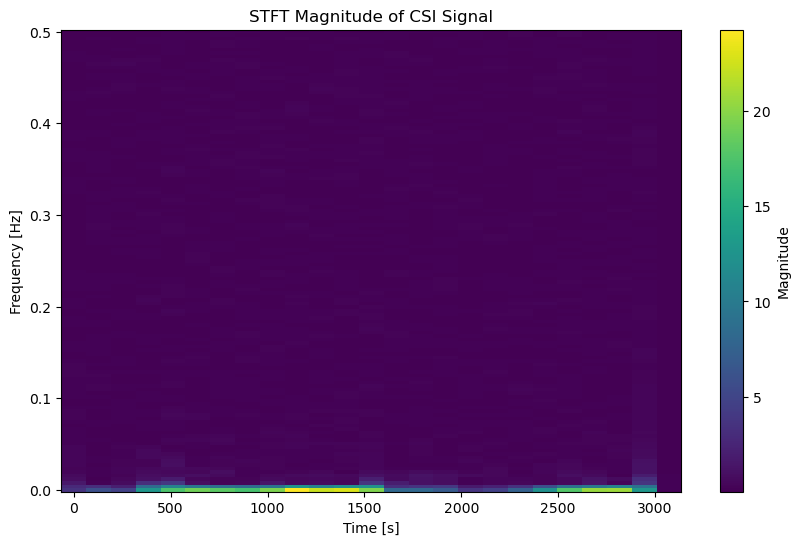

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

csi_data = np.load(r'E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_24_95.npy')  # 假设读取的数据是一个numpy数组

# 检查时间维度的大小
time_length = csi_data.shape[0]

# 如果时间维度不足3000，进行填充
if time_length < 3000:
    padding_size = 3000 - time_length
    csi_data = np.pad(csi_data, ((0, padding_size), (0, 0), (0, 0), (0, 0)), mode='constant', constant_values=0)

# 确保填充后数据的时间维度为3000
print(f"CSI Data Shape after padding: {csi_data.shape}")  # 输出填充后的数据形状

# 选择我们要分析的某一个发射天线、接收天线和子载波
# 这里以发射天线0，接收天线0，子载波0的幅度数据为例
signal = np.abs(csi_data[:, 0, 0, 0])  # 取第一个发射天线、接收天线、子载波的幅度

# 设置窗函数大小（例如 256 个点），并选择一个合适的步长（例如 128 个点）
nperseg = 256  # 每个窗的长度
noverlap = 128  # 窗之间的重叠长度

# 计算STFT
f, t, Zxx = stft(signal, nperseg=nperseg, noverlap=noverlap)

# Zxx是STFT的复数输出，我们可以计算幅度谱
magnitude = np.abs(Zxx)

# 绘制时频图（幅度谱）
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, magnitude, shading='auto')
plt.title("STFT Magnitude of CSI Signal")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.colorbar(label="Magnitude")
plt.show()


CSI Data Shape after padding: (3000, 3, 3, 30)


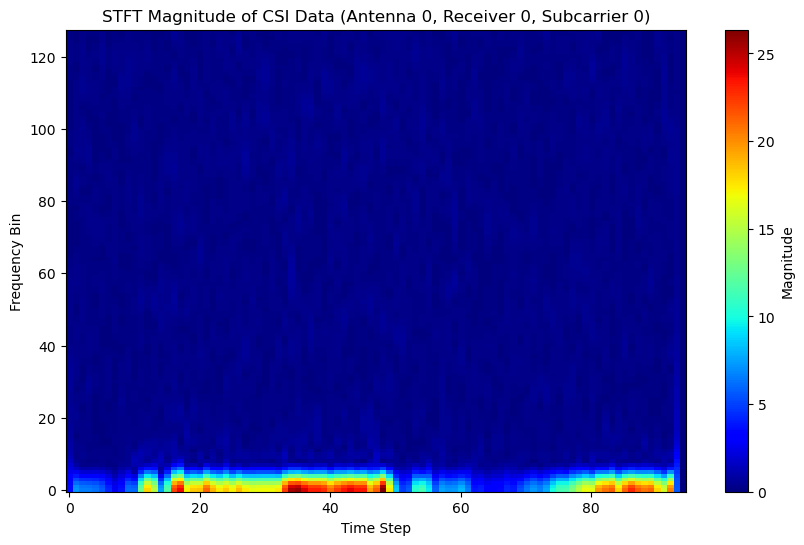

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# 读取 CSI 幅度信息
csi_data = np.load(r'E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_24_95.npy')  # 假设读取的数据是一个numpy数组

# 检查时间维度的大小
time_length = csi_data.shape[0]

# 如果时间维度不足3000，进行填充
if time_length < 3000:
    padding_size = 3000 - time_length
    csi_data = np.pad(csi_data, ((0, padding_size), (0, 0), (0, 0), (0, 0)), mode='constant', constant_values=0)

# 确保填充后数据的时间维度为3000
print(f"CSI Data Shape after padding: {csi_data.shape}")  # 输出填充后的数据形状

# 选择需要计算 STFT 的维度，通常是时间维度 (第 0 维)，对每个 (发射器天线，接收器天线，子载波数量) 进行 STFT
time_steps = csi_data.shape[0]  # 3000 时间步
antenna_num = csi_data.shape[1]  # 3 发射器天线
receiver_num = csi_data.shape[2]  # 3 接收器天线
subcarrier_num = csi_data.shape[3]  # 30 子载波

# 设置 STFT 参数
nfft = 256  # FFT 点数
window_size = 64  # 窗口大小
overlap = window_size // 2  # 重叠
nfft_half = nfft // 2  # 频谱的一半

# 存储时频图（每个发射器天线、接收器天线、子载波的时频图）
# 先不设定时间维度大小，后续计算时动态调整
time_freq = []

# 对每个子载波、发射器天线、接收器天线进行 STFT 计算
for tx in range(antenna_num):
    for rx in range(receiver_num):
        for sc in range(subcarrier_num):
            # 提取每个子载波的数据 (时间步长)
            signal = csi_data[:, tx, rx, sc]
            
            # 计算 STFT
            _, _, Zxx = stft(signal, nperseg=window_size, noverlap=overlap, nfft=nfft)
            
            # 只取正频率部分 (由于STFT对称)
            abs_Zxx = np.abs(Zxx[:nfft_half, :])  # 频率和时间步的幅度信息

            # 将结果追加到 time_freq 列表
            time_freq.append(abs_Zxx)

# 将时频图列表转换为numpy数组，形成 (发射器天线数, 接收器天线数, 子载波数, 频率bin数, 时间步数)
time_freq = np.array(time_freq)
time_freq = time_freq.reshape(antenna_num, receiver_num, subcarrier_num, nfft_half, -1)

# 4. 可视化时频图的一个例子 (显示第一个发射器天线、接收器天线、子载波的时频图)
plt.figure(figsize=(10, 6))
plt.imshow(time_freq[0, 0, 0], aspect='auto', origin='lower', cmap='jet')  # 直接用numpy数组
plt.colorbar(label='Magnitude')
plt.title('STFT Magnitude of CSI Data (Antenna 0, Receiver 0, Subcarrier 0)')
plt.xlabel('Time Step')
plt.ylabel('Frequency Bin')
plt.show()


CSI Data Shape after padding: (3000, 3, 3, 30)


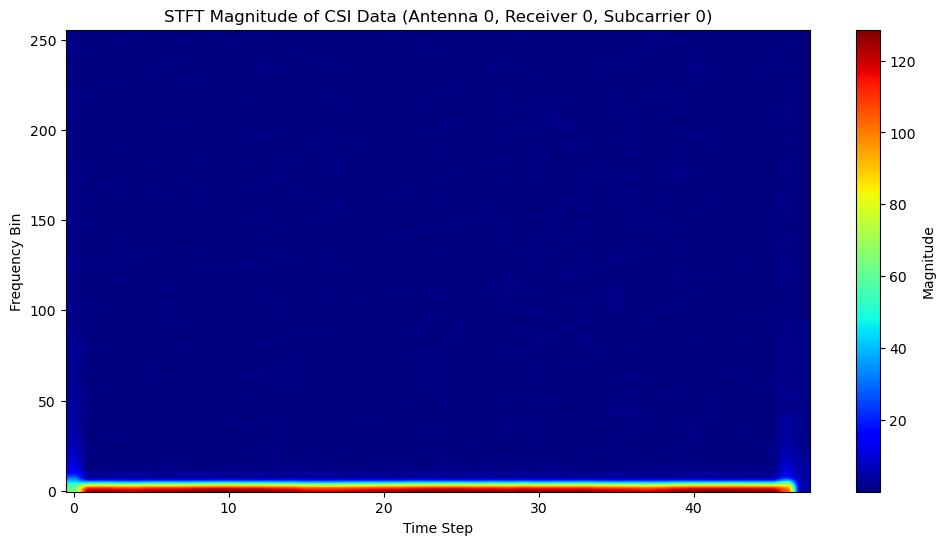

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# 读取 CSI 幅度信息
csi_data = np.load(r'E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_24_95.npy')  # 假设读取的数据是一个numpy数组

# 检查时间维度的大小
time_length = csi_data.shape[0]

# 如果时间维度不足3000，进行填充
if time_length < 3000:
    padding_size = 3000 - time_length
    csi_data = np.pad(csi_data, ((0, padding_size), (0, 0), (0, 0), (0, 0)), mode='constant', constant_values=0)

# 确保填充后数据的时间维度为3000
print(f"CSI Data Shape after padding: {csi_data.shape}")  # 输出填充后的数据形状

# 选择需要计算 STFT 的维度，通常是时间维度 (第 0 维)，对每个 (发射器天线，接收器天线，子载波数量) 进行 STFT
time_steps = csi_data.shape[0]  # 3000 时间步
antenna_num = csi_data.shape[1]  # 3 发射器天线
receiver_num = csi_data.shape[2]  # 3 接收器天线
subcarrier_num = csi_data.shape[3]  # 30 子载波

# 调整 STFT 参数以增加信息量
nfft = 512  # 增加 FFT 点数，提高频率分辨率
window_size = 128  # 增加窗口大小，提高频率分辨率
overlap = window_size // 2  # 保持重叠，提高时间分辨率
nfft_half = nfft // 2  # 频谱的一半

# 存储时频图（每个发射器天线、接收器天线、子载波的时频图）
time_freq = []

# 对每个子载波、发射器天线、接收器天线进行 STFT 计算
for tx in range(antenna_num):
    for rx in range(receiver_num):
        for sc in range(subcarrier_num):
            # 提取每个子载波的数据 (时间步长)
            signal = csi_data[:, tx, rx, sc]
            
            # 计算 STFT
            _, _, Zxx = stft(signal, nperseg=window_size, noverlap=overlap, nfft=nfft)
            
            # 只取正频率部分 (由于STFT对称)
            abs_Zxx = np.abs(Zxx[:nfft_half, :])  # 频率和时间步的幅度信息

            # 将结果追加到 time_freq 列表
            time_freq.append(abs_Zxx)

# 将时频图列表转换为numpy数组，形成 (发射器天线数, 接收器天线数, 子载波数, 频率bin数, 时间步数)
time_freq = np.array(time_freq)
time_freq = time_freq.reshape(antenna_num, receiver_num, subcarrier_num, nfft_half, -1)

# 4. 可视化时频图的一个例子 (显示第一个发射器天线、接收器天线、子载波的时频图)
plt.figure(figsize=(12, 6))
plt.imshow(time_freq[1, 1, 15], aspect='auto', origin='lower', cmap='jet')  # 直接用numpy数组
plt.colorbar(label='Magnitude')
plt.title('STFT Magnitude of CSI Data (Antenna 0, Receiver 0, Subcarrier 0)')
plt.xlabel('Time Step')
plt.ylabel('Frequency Bin')
plt.show()


CSI Data Shape after padding: (3000, 3, 3, 30)


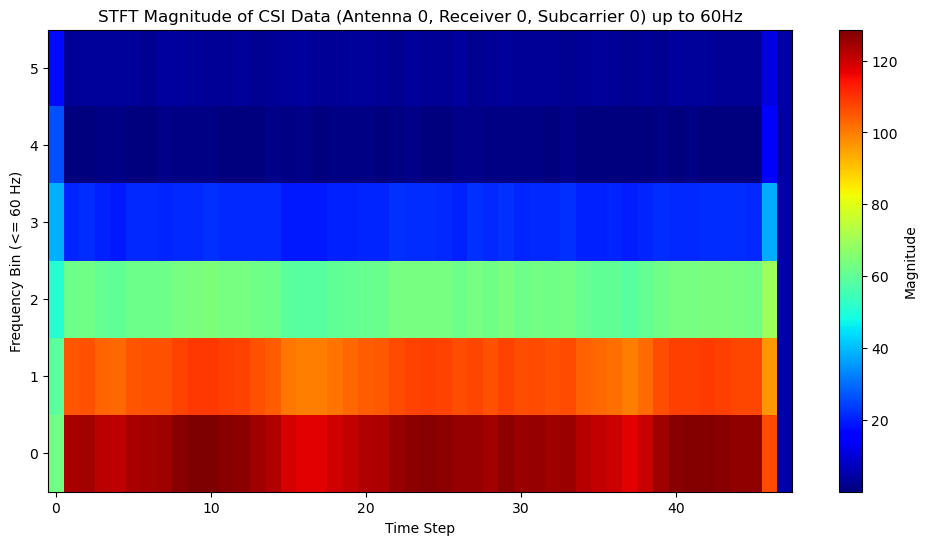

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# 读取 CSI 幅度信息
csi_data = np.load(r'E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_24_95.npy')  # 假设读取的数据是一个numpy数组

# 检查时间维度的大小
time_length = csi_data.shape[0]

# 如果时间维度不足3000，进行填充
if time_length < 3000:
    padding_size = 3000 - time_length
    csi_data = np.pad(csi_data, ((0, padding_size), (0, 0), (0, 0), (0, 0)), mode='constant', constant_values=0)

# 确保填充后数据的时间维度为3000
print(f"CSI Data Shape after padding: {csi_data.shape}")  # 输出填充后的数据形状

# 选择需要计算 STFT 的维度，通常是时间维度 (第 0 维)，对每个 (发射器天线，接收器天线，子载波数量) 进行 STFT
time_steps = csi_data.shape[0]  # 3000 时间步
antenna_num = csi_data.shape[1]  # 3 发射器天线
receiver_num = csi_data.shape[2]  # 3 接收器天线
subcarrier_num = csi_data.shape[3]  # 30 子载波

# 设置 STFT 参数
nfft = 256  # FFT 点数
sampling_rate = 3000  # 假设采样率为3000 Hz
window_size = 128  # 增加窗口大小，提高频率分辨率
overlap = window_size // 2  # 保持重叠，提高时间分辨率
nfft_half = nfft // 2  # 频谱的一半

# 计算频率轴（从 0 到 1500 Hz）
freqs = np.fft.fftfreq(nfft, d=1/sampling_rate)
freqs = freqs[:nfft_half]  # 只取正频率部分

# 选择低于 60 Hz 的频率 bin
max_freq = 60  # 最大频率为 60 Hz
freq_bins_to_keep = np.where(freqs <= max_freq)[0]  # 找到频率小于等于60Hz的频率 bin

# 存储时频图（每个发射器天线、接收器天线、子载波的时频图）
time_freq = []

# 对每个子载波、发射器天线、接收器天线进行 STFT 计算
for tx in range(antenna_num):
    for rx in range(receiver_num):
        for sc in range(subcarrier_num):
            # 提取每个子载波的数据 (时间步长)
            signal = csi_data[:, tx, rx, sc]
            
            # 计算 STFT
            _, _, Zxx = stft(signal, nperseg=window_size, noverlap=overlap, nfft=nfft)
            
            # 只取正频率部分
            abs_Zxx = np.abs(Zxx[:nfft_half, :])  # 获取频率和时间步的幅度信息

            # 选择低于 60Hz 的频率 bin
            abs_Zxx_60Hz = abs_Zxx[freq_bins_to_keep, :]  # 只保留低于60Hz的部分

            # 将结果追加到 time_freq 列表
            time_freq.append(abs_Zxx_60Hz)

# 将时频图列表转换为numpy数组，形成 (发射器天线数, 接收器天线数, 子载波数, 频率bin数, 时间步数)
time_freq = np.array(time_freq)
time_freq = time_freq.reshape(antenna_num, receiver_num, subcarrier_num, len(freq_bins_to_keep), -1)

# 4. 可视化时频图的一个例子 (显示第一个发射器天线、接收器天线、子载波的时频图)
plt.figure(figsize=(12, 6))
plt.imshow(time_freq[1, 1, 15], aspect='auto', origin='lower', cmap='jet')  # 直接用numpy数组
plt.colorbar(label='Magnitude')
plt.title('STFT Magnitude of CSI Data (Antenna 0, Receiver 0, Subcarrier 0) up to 60Hz')
plt.xlabel('Time Step')
plt.ylabel('Frequency Bin (<= 60 Hz)')
plt.show()


CSI Data Shape after padding: (3000, 3, 3, 30)
270
(11, 25)


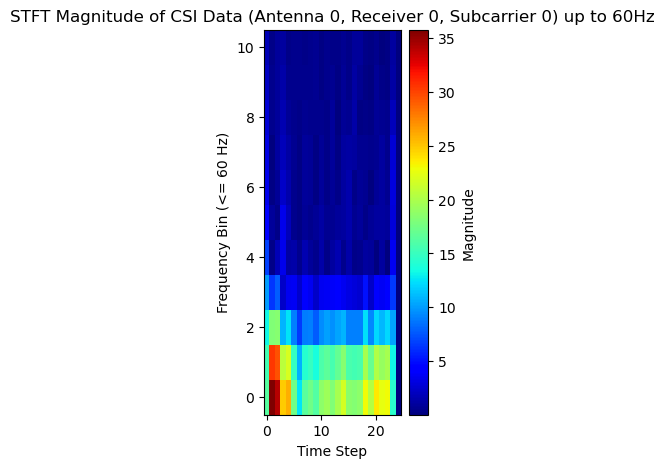

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# 读取 CSI 幅度信息
csi_data = np.load(r'E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_24_95.npy')  # 假设读取的数据是一个numpy数组

# 检查时间维度的大小
time_length = csi_data.shape[0]

# 如果时间维度不足3000，进行填充
if time_length < 3000:
    padding_size = 3000 - time_length
    csi_data = np.pad(csi_data, ((0, padding_size), (0, 0), (0, 0), (0, 0)), mode='constant', constant_values=0)

# 确保填充后数据的时间维度为3000
print(f"CSI Data Shape after padding: {csi_data.shape}")  # 输出填充后的数据形状

# 选择需要计算 STFT 的维度，通常是时间维度 (第 0 维)，对每个 (发射器天线，接收器天线，子载波数量) 进行 STFT
time_steps = csi_data.shape[0]  # 3000 时间步
antenna_num = csi_data.shape[1]  # 3 发射器天线
receiver_num = csi_data.shape[2]  # 3 接收器天线
subcarrier_num = csi_data.shape[3]  # 30 子载波

# 设置 STFT 参数，增加 nfft 和窗口大小
nfft = 512  # 增加 FFT 点数，提升频率分辨率
sampling_rate = 3000  # 假设采样率为3000 Hz
window_size = 256  # 增加窗口大小，提升频率分辨率
overlap = window_size // 2  # 保持适当的重叠，提高时间分辨率
nfft_half = nfft // 2  # 频谱的一半

# 计算频率轴（从 0 到 1500 Hz）
freqs = np.fft.fftfreq(nfft, d=1/sampling_rate)
freqs = freqs[:nfft_half]  # 只取正频率部分

# 选择低于 60 Hz 的频率 bin
max_freq = 60  # 最大频率为 60 Hz
freq_bins_to_keep = np.where(freqs <= max_freq)[0]  # 找到频率小于等于60Hz的频率 bin

# 存储时频图（每个发射器天线、接收器天线、子载波的时频图）
time_freq = []

# 对每个子载波、发射器天线、接收器天线进行 STFT 计算
for tx in range(antenna_num):
    for rx in range(receiver_num):
        for sc in range(subcarrier_num):
            # 提取每个子载波的数据 (时间步长)
            signal = csi_data[:, tx, rx, sc]
            
            # 计算 STFT
            _, _, Zxx = stft(signal, nperseg=window_size, noverlap=overlap, nfft=nfft)
            
            # 只取正频率部分
            abs_Zxx = np.abs(Zxx[:nfft_half, :])  # 获取频率和时间步的幅度信息

            # 选择低于 60Hz 的频率 bin
            abs_Zxx_60Hz = abs_Zxx[freq_bins_to_keep, :]  # 只保留低于60Hz的部分

            # 将结果追加到 time_freq 列表
            time_freq.append(abs_Zxx_60Hz)
            
print(len(time_freq))

# 将时频图列表转换为numpy数组，形成 (发射器天线数, 接收器天线数, 子载波数, 频率bin数, 时间步数)
time_freq = np.array(time_freq)
time_freq = time_freq.reshape(antenna_num, receiver_num, subcarrier_num, len(freq_bins_to_keep), -1)

print(time_freq[1, 2, 18].shape)

# 4. 可视化时频图的一个例子 (显示第一个发射器天线、接收器天线、子载波的时频图)
plt.figure(figsize=(2.2, 5))
plt.imshow(time_freq[1, 2, 18], aspect='auto', origin='lower', cmap='jet')  # 直接用numpy数组
plt.colorbar(label='Magnitude')
plt.title('STFT Magnitude of CSI Data (Antenna 0, Receiver 0, Subcarrier 0) up to 60Hz')
plt.xlabel('Time Step')
plt.ylabel('Frequency Bin (<= 60 Hz)')
plt.show()


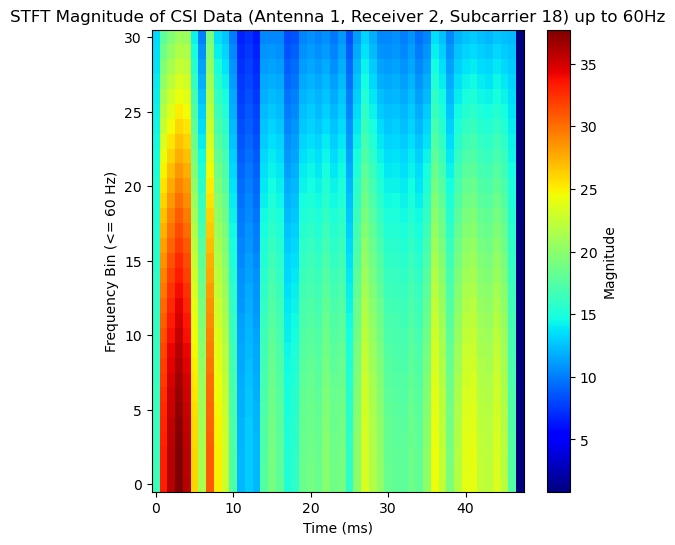

In [73]:
# 调整窗口大小和重叠，以获得更高的时间分辨率
window_size = 128  # 更小的窗口大小
overlap = window_size // 2  # 增加重叠
nfft = 4096  # 增加 FFT 点数，保持频率分辨率

# 重新计算时频图
time_freq = []

for tx in range(antenna_num):
    for rx in range(receiver_num):
        for sc in range(subcarrier_num):
            signal = csi_data[:, tx, rx, sc]
            _, _, Zxx = stft(signal, nperseg=window_size, noverlap=overlap, nfft=nfft)
            abs_Zxx = np.abs(Zxx[:nfft_half, :])
            abs_Zxx_60Hz = abs_Zxx[freq_bins_to_keep, :]
            time_freq.append(abs_Zxx_60Hz)

time_freq = np.array(time_freq)
time_freq = time_freq.reshape(antenna_num, receiver_num, subcarrier_num, len(freq_bins_to_keep), -1)

# 可视化时频图
plt.figure(figsize=(6, 6))
plt.imshow(time_freq[1, 2, 18], aspect='auto', origin='lower', cmap='jet')
plt.colorbar(label='Magnitude')
plt.title('STFT Magnitude of CSI Data (Antenna 1, Receiver 2, Subcarrier 18) up to 60Hz')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency Bin (<= 60 Hz)')
plt.show()


CSI Data Shape after padding: (3000, 3, 3, 30)


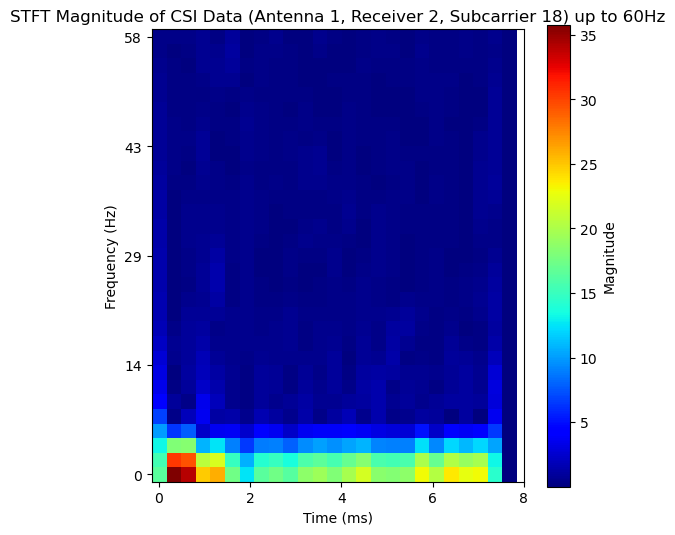

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# 读取 CSI 幅度信息
csi_data = np.load(r'E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_24_95.npy')  # 假设读取的数据是一个numpy数组

# 检查时间维度的大小
time_length = csi_data.shape[0]

# 如果时间维度不足3000，进行填充
if time_length < 3000:
    padding_size = 3000 - time_length
    csi_data = np.pad(csi_data, ((0, padding_size), (0, 0), (0, 0), (0, 0)), mode='constant', constant_values=0)

# 确保填充后数据的时间维度为3000
print(f"CSI Data Shape after padding: {csi_data.shape}")  # 输出填充后的数据形状

# 选择需要计算 STFT 的维度，通常是时间维度 (第 0 维)，对每个 (发射器天线，接收器天线，子载波数量) 进行 STFT
time_steps = csi_data.shape[0]  # 3000 时间步
antenna_num = csi_data.shape[1]  # 3 发射器天线
receiver_num = csi_data.shape[2]  # 3 接收器天线
subcarrier_num = csi_data.shape[3]  # 30 子载波

# 设置 STFT 参数，增加 nfft 和窗口大小
nfft = 512  # 增加 FFT 点数，提升频率分辨率
sampling_rate = 1000  # 采样率为1000 Hz
window_size = 256  # 增加窗口大小，提升频率分辨率
overlap = window_size // 2  # 保持适当的重叠，提高时间分辨率
nfft_half = nfft // 2  # 频谱的一半

# 计算频率轴（从 0 到 500 Hz）
freqs = np.fft.fftfreq(nfft, d=1/sampling_rate)  # 频率轴，单位为Hz
freqs = freqs[:nfft_half]  # 只取正频率部分

# 选择低于 60 Hz 的频率 bin
max_freq = 60  # 最大频率为 60 Hz
freq_bins_to_keep = np.where(freqs <= max_freq)[0]  # 找到频率小于等于60Hz的频率 bin

# 存储时频图（每个发射器天线、接收器天线、子载波的时频图）
time_freq = []

# 对每个子载波、发射器天线、接收器天线进行 STFT 计算
for tx in range(antenna_num):
    for rx in range(receiver_num):
        for sc in range(subcarrier_num):
            signal = csi_data[:, tx, rx, sc]
            _, _, Zxx = stft(signal, nperseg=window_size, noverlap=overlap, nfft=nfft)
            abs_Zxx = np.abs(Zxx[:nfft_half, :])
            abs_Zxx_60Hz = abs_Zxx[freq_bins_to_keep, :]  # 只保留低于60Hz的部分
            time_freq.append(abs_Zxx_60Hz)

# 将时频图列表转换为numpy数组，形成 (发射器天线数, 接收器天线数, 子载波数, 频率bin数, 时间步数)
time_freq = np.array(time_freq)
time_freq = time_freq.reshape(antenna_num, receiver_num, subcarrier_num, len(freq_bins_to_keep), -1)

# 4. 可视化时频图的一个例子
plt.figure(figsize=(6, 6))  # 设置为正方形的尺寸
plt.imshow(time_freq[1, 2, 18], aspect='equal', origin='lower', cmap='jet')  # 直接用numpy数组
plt.colorbar(label='Magnitude')

# 设置 x 轴为实际时间（单位：ms）
time_axis = np.arange(time_freq.shape[-1]) * (1000 / time_steps)  # 计算实际时间（单位：ms）
plt.xticks(ticks=np.linspace(0, time_freq.shape[-1], num=5),
           labels=np.linspace(time_axis[0], time_axis[-1], num=5).astype(int))

# 设置 y 轴为频率（单位：Hz）
plt.yticks(ticks=np.linspace(0, len(freq_bins_to_keep)-1, num=5),
           labels=np.linspace(freqs[freq_bins_to_keep[0]], freqs[freq_bins_to_keep[-1]], num=5).astype(int))

plt.title('STFT Magnitude of CSI Data (Antenna 1, Receiver 2, Subcarrier 18) up to 60Hz')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.show()


(4097, 48)


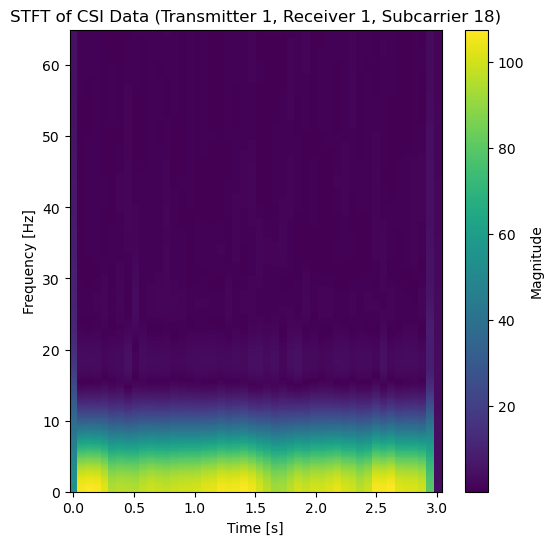

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# 读取 CSI 幅度信息
csi_data = np.load(r'E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_24_95.npy')  # 假设读取的数据是一个numpy数组

# 检查时间维度的大小
time_length = csi_data.shape[0]

# 如果时间维度不足3000，进行填充
if time_length < 3000:
    padding_size = 3000 - time_length
    csi_data = np.pad(csi_data, ((0, padding_size), (0, 0), (0, 0), (0, 0)), mode='constant', constant_values=0)

# 选择窗口大小和重叠比例
window_size = 128  # 增大窗口大小以获得较低的频率分辨率
overlap_size = 64  # 设置重叠量

# 计算 STFT 并可视化结果
# 选择一个发射器（0），接收器（0）和子载波（0）进行可视化
transmitter_idx = 1
receiver_idx = 1
subcarrier_idx = 18

# 提取特定发射器、接收器和子载波的时间序列
signal = csi_data[:, transmitter_idx, receiver_idx, subcarrier_idx]

# 计算 STFT
f, t, Zxx = stft(signal, nperseg=window_size, noverlap=overlap_size, fs=1000, nfft=8192)
print(Zxx.shape)

# 可视化时频图（幅度谱）
plt.figure(figsize=(6, 6))
plt.pcolormesh(t, f, np.abs(Zxx), shading='auto')
plt.title(f'STFT of CSI Data (Transmitter {transmitter_idx}, Receiver {receiver_idx}, Subcarrier {subcarrier_idx})')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Magnitude')
plt.ylim([0, 65])  # 显示 0 到 100 Hz 之间的频率
plt.show()


[0.         0.48828125 0.9765625  1.46484375 1.953125  ]
(1025, 13)
(123, 13)
(123,)


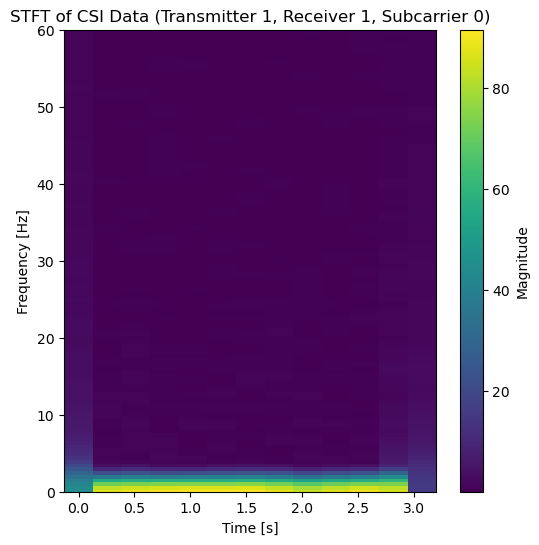

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# 读取 CSI 幅度信息
csi_data = np.load(r'E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_24_95.npy')  # 假设读取的数据是一个numpy数组

# 检查时间维度的大小
time_length = csi_data.shape[0]

# 如果时间维度不足3000，进行填充
if time_length < 3000:
    padding_size = 3000 - time_length
    csi_data = np.pad(csi_data, ((0, padding_size), (0, 0), (0, 0), (0, 0)), mode='constant', constant_values=0)

# 选择窗口大小和重叠比例
window_size = 512  # 增大窗口大小以获得较低的频率分辨率
overlap_size = 256  # 设置重叠量

# 计算 STFT 并可视化结果
# 选择一个发射器（0），接收器（0）和子载波（0）进行可视化
transmitter_idx = 1
receiver_idx = 1
subcarrier_idx = 0

# 提取特定发射器、接收器和子载波的时间序列
signal = csi_data[:, transmitter_idx, receiver_idx, subcarrier_idx]

# 计算 STFT
f, t, Zxx = stft(signal, nperseg=window_size, noverlap=overlap_size, fs=1000, nfft=2048, window='hamming')
print(Zxx.shape)
freq_range = np.logical_and(f >= 0, f <= 60)
Zxx_filtered = Zxx[freq_range, :]  # 保留 0-60 Hz 的频率数据
f_filtered = f[freq_range]  # 过滤后的频率
print(Zxx_filtered.shape)
print(f_filtered.shape)

# 可视化时频图（幅度谱）
plt.figure(figsize=(6, 6))
plt.pcolormesh(t, f, np.abs(Zxx), shading='auto')
plt.title(f'STFT of CSI Data (Transmitter {transmitter_idx}, Receiver {receiver_idx}, Subcarrier {subcarrier_idx})')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Magnitude')
plt.ylim([0, 60])  # 显示 0 到 100 Hz 之间的频率
plt.show()


In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# 读取 CSI 数据
csi_data = np.load(r'E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_24_95.npy')  # 假设读取的数据是一个numpy数组

# CSI 数据的形状：time x transmitter x receiver x subcarrier
time_length = csi_data.shape[0]  # 时间维度的长度（3000）

# 假设我们想对每个发射器、接收器、子载波的组合进行分析
transmitter_count = csi_data.shape[1]  # 发射器的数量（3）
receiver_count = csi_data.shape[2]    # 接收器的数量（3）
subcarrier_count = csi_data.shape[3]  # 子载波的数量（30）

# 参数设置
fs = 1000        # 采样频率（Hz）
nfft = 2048      # FFT 点数，提供较好的频率分辨率
nperseg = 512    # 每个时间窗口的长度
noverlap = 256   # 窗口重叠大小（50%）
window = 'hamming'

# 初始化一个空数组用于存储所有组合的 STFT 结果
Zxx_all = []

# 选择要计算的发射器、接收器和子载波的索引
# 这里只是示例，我们可以选择所有组合进行计算
# 例如，计算第一个发射器、接收器和子载波的组合
for tx in range(transmitter_count):
    for rx in range(receiver_count):
        for sc in range(subcarrier_count):
            # 提取对应的CSI数据（这里只是选择某个发射器、接收器和子载波）
            signal = csi_data[:, tx, rx, sc]  # time x 1维信号（单个发射器、接收器、子载波）

            # 计算 STFT
            f, t, Zxx = stft(signal, fs=fs, nperseg=nperseg, noverlap=noverlap, nfft=nfft, window=window)
            # 找到 0 - 60 Hz 范围内的频率索引
            freq_range = np.logical_and(f >= 0, f <= 60)
            Zxx_filtered = Zxx[freq_range, :]  # 保留 0-60 Hz 的频率数据
            f_filtered = f[freq_range]  # 过滤后的频率
            # print(Zxx_filtered.shape)
            Zxx_all.append(np.abs(Zxx_filtered))
            
# 将 Zxx_all 转换为一个 numpy 数组，形状为 (270, 123, 13)
Zxx_all = np.array(Zxx_all)

# 确保输出的形状是 (270, 123, 13)
assert Zxx_all.shape == (270, 123, 13)

# 保存为 .npy 文件
# np.save(r'E:\WorkSpace\WiMANS\dataset\wifi_csi\stft_data.npy', Zxx_all)

print("STFT 计算并保存完成，Zxx_all 的 shape 为：", Zxx_all.shape)
            

STFT 计算并保存完成，Zxx_all 的 shape 为： (270, 123, 13)


In [95]:
import numpy as np
from scipy.signal import stft

def compute_stft(csi_file_path, fs=1000, nfft=2048, nperseg=512, noverlap=256, window='hamming'):
    """
    计算 CSI 数据的 STFT 并返回 0-60 Hz 范围内的 STFT 结果。
    
    参数：
    - csi_file_path (str): 输入的 CSI 数据文件路径。
    - fs (int): 采样频率，默认 1000 Hz。
    - nfft (int): FFT 点数，默认 2048。
    - nperseg (int): 每个时间窗口的长度，默认 512。
    - noverlap (int): 窗口重叠大小，默认 256。
    - window (str): 窗口函数类型，默认 'hamming'。
    
    返回：
    - Zxx_all (numpy.ndarray): 计算出的所有组合的 STFT 数据，形状为 (270, 123, 13)。
    """
    csi_data = np.load(csi_file_path)
    
    transmitter_count = csi_data.shape[1]
    receiver_count = csi_data.shape[2]
    subcarrier_count = csi_data.shape[3]

    Zxx_all = []

    for tx in range(transmitter_count):
        for rx in range(receiver_count):
            for sc in range(subcarrier_count):
                # 提取对应的CSI数据（这里只是选择某个发射器、接收器和子载波）
                signal = csi_data[:, tx, rx, sc]  # time x 1维信号（单个发射器、接收器、子载波）

                # 计算 STFT
                f, t, Zxx = stft(signal, fs=fs, nperseg=nperseg, noverlap=noverlap, nfft=nfft, window=window)
                
                # 找到 0 - 60 Hz 范围内的频率索引
                freq_range = np.logical_and(f >= 0, f <= 60)
                Zxx_filtered = Zxx[freq_range, :]  # 保留 0-60 Hz 的频率数据
                
                # 将每个组合的结果保存到 Zxx_all 列表中
                Zxx_all.append(np.abs(Zxx_filtered))  # 使用绝对值以保留幅度信息

    # 将 Zxx_all 转换为一个 numpy 数组，形状为 (270, 123, 13)，并返回
    return np.array(Zxx_all)

# 示例调用：
file_path = r'E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_24_95.npy'
Zxx_all = compute_stft(file_path)

# 打印输出 shape 信息
print("STFT 计算完成，Zxx_all 的 shape 为：", Zxx_all.shape)


STFT 计算完成，Zxx_all 的 shape 为： (270, 123, 13)


In [96]:
import os
import numpy as np

def process_all_npy_files(parent_folder, save_folder, fs=1000, nfft=2048, nperseg=512, noverlap=256, window='hamming'):
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    
    for filename in os.listdir(parent_folder):
        file_path = os.path.join(parent_folder, filename)

        Zxx_all = compute_stft(file_path, fs=fs, nfft=nfft, nperseg=nperseg, noverlap=noverlap, window=window)

        # 保存计算结果到指定的文件夹，文件名与输入文件相同
        save_path = os.path.join(save_folder, filename)
        np.save(save_path, Zxx_all)
        print(f"已保存 STFT 结果: {save_path}")

# 示例调用：
parent_folder = r'E:\WorkSpace\WiMANS\dataset\wifi_csi\amp'  # 输入的父文件夹路径
save_folder = r'E:\WorkSpace\WiMANS\dataset\wifi_csi\stft'  # 保存结果的文件夹路径

process_all_npy_files(parent_folder, save_folder)


已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_1.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_10.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_11.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_12.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_13.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_14.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_15.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_16.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_17.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_18.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_19.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_2.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_20.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_100_21.npy
已保存 STFT 结果: E:\WorkSp

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_30.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_31.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_32.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_33.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_34.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_35.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_36.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_37.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_38.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_39.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_4.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_40.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_41.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_101_42.npy
已保存 STFT 结果: E:\WorkS

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_50.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_51.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_52.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_53.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_54.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_55.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_56.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_57.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_58.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_59.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_6.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_60.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_61.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_102_62.npy
已保存 STFT 结果: E:\WorkS

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_69.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_7.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_70.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_71.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_72.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_73.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_74.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_75.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_76.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_77.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_78.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_79.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_8.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_103_80.npy
已保存 STFT 结果: E:\WorkSp

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_88.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_89.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_9.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_90.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_91.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_92.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_93.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_94.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_95.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_96.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_97.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_98.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_104_99.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_105_1.npy
已保存 STFT 结果: E:\WorkSp

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_16.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_17.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_18.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_19.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_2.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_20.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_21.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_22.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_23.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_24.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_25.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_26.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_27.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_106_28.npy
已保存 STFT 结果: E:\WorkS

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_36.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_37.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_38.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_39.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_4.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_40.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_41.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_42.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_43.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_44.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_45.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_46.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_47.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_107_48.npy
已保存 STFT 结果: E:\WorkS

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_57.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_58.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_59.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_6.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_60.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_61.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_62.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_63.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_64.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_65.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_66.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_67.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_68.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_108_69.npy
已保存 STFT 结果: E:\WorkS

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_77.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_78.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_79.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_8.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_80.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_81.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_82.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_83.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_84.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_85.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_86.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_87.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_88.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_10_89.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\da

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_11_95.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_11_96.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_11_97.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_11_98.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_11_99.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_12_1.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_12_10.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_12_11.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_12_12.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_12_13.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_12_14.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_12_15.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_12_16.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_12_17.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\da

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_23.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_24.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_25.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_26.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_27.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_28.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_29.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_3.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_30.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_31.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_32.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_33.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_34.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_13_35.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\da

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_41.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_42.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_43.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_44.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_45.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_46.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_47.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_48.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_49.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_5.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_50.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_51.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_52.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_14_53.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\da

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_60.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_61.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_62.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_63.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_64.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_65.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_66.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_67.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_68.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_69.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_7.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_70.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_71.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_15_72.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\da

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_8.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_80.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_81.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_82.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_83.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_84.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_85.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_86.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_87.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_88.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_89.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_9.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_90.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_16_91.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dat

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_17_99.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_1.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_10.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_11.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_12.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_13.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_14.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_15.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_16.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_17.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_18.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_19.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_2.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_18_20.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dat

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_29.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_3.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_30.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_31.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_32.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_33.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_34.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_35.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_36.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_37.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_38.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_39.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_4.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_19_40.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dat

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_5.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_50.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_51.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_52.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_53.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_54.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_55.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_56.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_57.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_58.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_59.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_6.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_60.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_1_61.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_70.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_71.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_72.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_73.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_74.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_75.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_76.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_77.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_78.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_79.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_8.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_80.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_81.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_201_82.npy
已保存 STFT 结果: E:\WorkS

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_202_9.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_202_90.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_202_91.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_202_92.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_202_93.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_202_94.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_202_95.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_202_96.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_202_97.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_202_98.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_202_99.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_203_1.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_203_10.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_203_11.npy
已保存 STFT 结果: E:\WorkSp

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_2.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_20.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_21.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_22.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_23.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_24.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_25.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_26.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_27.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_28.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_29.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_3.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_30.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_204_31.npy
已保存 STFT 结果: E:\WorkSp

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_38.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_39.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_4.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_40.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_41.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_42.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_43.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_44.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_45.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_46.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_47.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_48.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_49.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_205_5.npy
已保存 STFT 结果: E:\WorkSp

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_57.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_58.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_59.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_6.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_60.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_61.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_62.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_63.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_64.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_65.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_66.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_67.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_68.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_206_69.npy
已保存 STFT 结果: E:\WorkS

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_76.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_77.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_78.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_79.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_8.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_80.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_81.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_82.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_83.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_84.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_85.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_86.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_87.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_20_88.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\da

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_21_96.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_21_97.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_21_98.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_21_99.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_22_1.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_22_10.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\stft\act_22_11.npy


KeyboardInterrupt: 

In [97]:
import os
import numpy as np
from scipy.signal import stft


def compute_stft(csi_file_path, fs=1000, nfft=2048, nperseg=512, noverlap=256, window='hamming'):
    csi_data = np.load(csi_file_path)
    time, transmitter_count, receiver_count, subcarrier_count = csi_data.shape
    if time < 3000:
        csi_data = np.pad(csi_data, ((0, 3000 - time), (0, 0), (0, 0), (0, 0)), mode='constant', constant_values=0)

    Zxx_270 = []

    for tx in range(transmitter_count):
        for rx in range(receiver_count):
            for sc in range(subcarrier_count):
                signal = csi_data[:, tx, rx, sc]
                freqs, time, Zxx = stft(signal, fs=fs, nperseg=nperseg, noverlap=noverlap, nfft=nfft, window=window)
                freq_range = np.logical_and(freqs >= 0, freqs <= 60)
                Zxx_270.append(np.abs(Zxx[freq_range, :]))  # 使用绝对值保留幅度信息

    return np.array(Zxx_270)


def compute_save_all_stft(parent_path, save_path, fs=1000, nfft=2048, nperseg=512, noverlap=256, window='hamming'):
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    for filename in os.listdir(parent_path):
        Zxx_270 = compute_stft(os.path.join(parent_path, filename),
                               fs=fs, nfft=nfft, nperseg=nperseg, noverlap=noverlap, window=window)
        save_path = os.path.join(save_path, filename)
        np.save(save_path, Zxx_270)
        print(f"已保存 STFT 结果: {save_path}")

In [98]:
compute_save_all_stft(r'E:\WorkSpace\WiMANS\dataset\wifi_csi\amp',
                      r'E:\WorkSpace\WiMANS\dataset\wifi_csi\stft')

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_100_1.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_100_10.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_100_11.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_100_12.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_100_13.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_100_14.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_100_15.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_100_16.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_100_17.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_100_18.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_100_19.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_100_2.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_100_20.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_100_21.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dat

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_101_30.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_101_31.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_101_32.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_101_33.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_101_34.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_101_35.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_101_36.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_101_37.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_101_38.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_101_39.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_101_4.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_101_40.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_101_41.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_101_42.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\da

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_102_49.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_102_5.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_102_50.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_102_51.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_102_52.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_102_53.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_102_54.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_102_55.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_102_56.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_102_57.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_102_58.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_102_59.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_102_6.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_102_60.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dat

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_103_69.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_103_7.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_103_70.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_103_71.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_103_72.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_103_73.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_103_74.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_103_75.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_103_76.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_103_77.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_103_78.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_103_79.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_103_8.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_103_80.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dat

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_104_87.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_104_88.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_104_89.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_104_9.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_104_90.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_104_91.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_104_92.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_104_93.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_104_94.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_104_95.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_104_96.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_104_97.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_104_98.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_104_99.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\da

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_106_17.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_106_18.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_106_19.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_106_2.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_106_20.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_106_21.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_106_22.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_106_23.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_106_24.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_106_25.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_106_26.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_106_27.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_106_28.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_106_29.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\da

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_107_35.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_107_36.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_107_37.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_107_38.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_107_39.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_107_4.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_107_40.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_107_41.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_107_42.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_107_43.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_107_44.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_107_45.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_107_46.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_107_47.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\da

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_108_56.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_108_57.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_108_58.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_108_59.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_108_6.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_108_60.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_108_61.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_108_62.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_108_63.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_108_64.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_108_65.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_108_66.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_108_67.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_108_68.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\da

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_10_75.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_10_76.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_10_77.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_10_78.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_10_79.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_10_8.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_10_80.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_10_81.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_10_82.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_10_83.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_10_84.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_10_85.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_10_86.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_10_87.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_11_95.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_11_96.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_11_97.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_11_98.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_11_99.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_12_1.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_12_10.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_12_11.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_12_12.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_12_13.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_12_14.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_12_15.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_12_16.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_12_17.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_13_26.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_13_27.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_13_28.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_13_29.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_13_3.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_13_30.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_13_31.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_13_32.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_13_33.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_13_34.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_13_35.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_13_36.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_13_37.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_13_38.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_14_49.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_14_5.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_14_50.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_14_51.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_14_52.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_14_53.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_14_54.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_14_55.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_14_56.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_14_57.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_14_58.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_14_59.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_14_6.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_14_60.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\

已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_15_7.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_15_70.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_15_71.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_15_72.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_15_73.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_15_74.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_15_75.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_15_76.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_15_77.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_15_78.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_15_79.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_15_8.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_15_80.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\amp\act_15_81.npy
已保存 STFT 结果: E:\WorkSpace\WiMANS\dataset\wifi_csi\


KeyboardInterrupt

